<a href="https://colab.research.google.com/github/mmdreza-ghorbani/Thesis_codes/blob/main/CNN%2C%20MLP%2C%20RF%2C%20XGBoost%2C%20RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import modules

In [ ]:
!pip install geopandas
!pip install rasterio



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 27.9 MB/s eta 0:00:00


In [ ]:

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rasterio
import rasterio.mask
from rasterio.plot import show
from rasterio.transform import Affine
from scipy.spatial import Voronoi, voronoi_plot_2d
from shapely.geometry import box
from shapely.geometry import Polygon, Point
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

get access from user

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
TifExportUrl = '/content/drive/My Drive/Tif_Export/'
ShapefilesURL='/content/drive/My Drive/ShapeFiles/'
mainURL = '/content/drive/My Drive/'
AirPolutionURL='/content/drive/My Drive/AIRNOW/'
AsthemaricURL = '/content/drive/My Drive/AsthematicData/'
import numpy as np
from osgeo import gdal
import geopandas as gpd

AsthematicNormalized = gpd.read_file(AsthemaricURL + 'AsmethicWithValues_normalized.shp')



In [ ]:
AsthematicNormalized = AsthematicNormalized.fillna(0)

In [ ]:
import pandas as pd
dataset = pd.DataFrame(AsthematicNormalized.drop(columns='geometry'))

crop map

In [ ]:
def cropMaps(raster_pk,counties,outputName):
 out_image_pk, out_transform_pk = rasterio.mask.mask(raster_pk, counties.geometry.values, crop = True)
 out_meta = raster_pk.meta
 out_meta.update({"driver": "GTiff",
                 "height": out_image_pk.shape[1],
                 "width": out_image_pk.shape[2],
                 "transform": out_transform_pk})
 with rasterio.open(TifExportUrl + outputName + ".tif", "w", **out_meta) as dest:
      dest.write(out_image_pk)

## Describe Data

In [ ]:
display(dataset)

IsAsthma  h_Map_Exte  vv_Map_Ext  n_Map_Exte  dd_Map_Ext  ff_Map_Ext  \
0            0    0.723744    0.368168    0.743858         1.0    0.596653   
1            0    0.461619    0.758035    0.743858         1.0    0.477426   
2            0    0.931490    0.121972    0.743858         1.0    0.448816   
3            0    0.555978    0.701599    0.743858         1.0    0.417477   
4            0    0.857890    0.494326    0.743858         1.0    0.301632   
...        ...         ...         ...         ...         ...         ...   
1475         1    0.466972    0.716572    0.743858         1.0    0.593921   
1476         1    0.467442    0.717465    0.743858         1.0    0.590433   
1477         1    0.469245    0.716083    0.743858         1.0    0.589696   
1478         1    0.439579    0.752310    0.743858         1.0    0.566473   
1479         1    0.439117    0.755177    0.743858         1.0    0.559674   

      t_Map_Exte  td_Map_Ext  p0_Map_Ext  rrr_Map_Ex  ...  ff_gust_Ma  \
0       0.905410    0.458071    0.797379    0.025455  ...     0.66845   
1       0.629396    0.475423    0.580633    0.337561  ...     0.66845   
2       0.946791    0.384998    0.721981    0.022905  ...     0.66845   
3       0.645272    0.375669    0.568028    0.308216  ...     0.66845   
4       0.751010    0.182028    0.583912    0.155869  ...     0.66845   
...          ...         ...         ...         ...  ...         ...   
1475    0.750738    0.600348    0.731704    0.199111  ...     0.66845   
1476    0.747768    0.596885    0.727723    0.202404  ...     0.66845   
1477    0.747839    0.593922    0.727269    0.201626  ...     0.66845   
1478    0.711548    0.608849    0.689909    0.254062  ...     0.66845   
1479    0.703802    0.600845    0.680396    0.262463  ...     0.66845   

      dd_gust_Ma  newSlop.ti  newElavati  newDistanc  Tehran_NDV  newAirpolu  \
0       0.706565    0.032383    0.067606    0.000000    0.404536    0.852860   
1       0.896765    0.021868    0.043380    0.000000    0.515283    0.353632   
2       0.653059    0.013795    0.150986    0.000000    0.507389    0.642409   
3       0.921005    0.032383    0.065352    0.158114    0.405428    0.394840   
4       0.907291    0.451392    0.295211    0.492443    0.403647    0.089038   
...          ...         ...         ...         ...         ...         ...   
1475    0.907371    0.043692    0.012958    0.838153    0.458775    0.695516   
1476    0.906990    0.021860    0.013521    0.776209    0.448888    0.696618   
1477    0.906993    0.093993    0.014648    0.550000    0.444352    0.700760   
1478    0.899752    0.021860    0.011831    0.158114    0.451945    0.582946   
1479    0.898443    0.000000    0.015211    0.100000    0.470857    0.566107   

      newLandUse   pixel_x   pixel_y  
0       1.000000  0.302553  0.645890  
1       0.216216  0.741277  0.780822  
2       0.394595  0.218298  0.350685  
3       0.216216  0.690638  0.650000  
4       0.216216  0.482979  0.219178  
...          ...       ...       ...  
1475    0.081081  0.651064  0.956164  
1476    0.216216  0.653617  0.951370  
1477    0.216216  0.651915  0.948630  
1478    0.275676  0.708085  0.950685  
1479    0.216216  0.714043  0.940411  

[1480 rows x 27 columns]

In [ ]:
dataset.describe()

IsAsthma   h_Map_Exte   vv_Map_Ext   n_Map_Exte   dd_Map_Ext  \
count  1480.000000  1480.000000  1480.000000  1480.000000  1480.000000   
mean      0.500000     0.639982     0.586532     0.743682     0.999922   
std       0.500169     0.199066     0.164256     0.006254     0.002023   
min       0.000000     0.134071     0.017820     0.503681     0.923320   
25%       0.000000     0.516054     0.497706     0.743858     1.000000   
50%       0.500000     0.671013     0.635022     0.743858     1.000000   
75%       1.000000     0.798513     0.706595     0.743858     1.000000   
max       1.000000     0.993572     0.869288     0.744629     1.000000   

        ff_Map_Ext   t_Map_Exte   td_Map_Ext   p0_Map_Ext   rrr_Map_Ex  ...  \
count  1480.000000  1480.000000  1480.000000  1480.000000  1480.000000  ...   
mean      0.370337     0.699233     0.360913     0.580004     0.285387  ...   
std       0.138373     0.141575     0.138227     0.136392     0.254873  ...   
min       0.016030     0.137128     0.006544     0.101546     0.002216  ...   
25%       0.281462     0.619000     0.271047     0.496178     0.086206  ...   
50%       0.393167     0.711854     0.347052     0.612445     0.205474  ...   
75%       0.476966     0.792620     0.427944     0.685667     0.401512  ...   
max       0.618319     0.994012     0.786026     0.797379     0.959542  ...   

        ff_gust_Ma   dd_gust_Ma   newSlop.ti   newElavati   newDistanc  \
count  1480.000000  1480.000000  1480.000000  1480.000000  1480.000000   
mean      0.668444     0.891184     0.078482     0.139990     0.269439   
std       0.000240     0.097734     0.075380     0.097549     0.253640   
min       0.659209     0.239841     0.000000     0.011831     0.000000   
25%       0.668450     0.877257     0.032392     0.065775     0.050000   
50%       0.668450     0.913392     0.055108     0.104789     0.200000   
75%       0.668450     0.949026     0.096800     0.194930     0.427200   
max       0.668450     0.998896     0.542616     0.516056     1.000000   

        Tehran_NDV   newAirpolu   newLandUse      pixel_x      pixel_y  
count  1480.000000  1480.000000  1480.000000  1480.000000  1480.000000  
mean      0.433704     0.433765     0.310665     0.581690     0.475195  
std       0.036495     0.266383     0.237104     0.167261     0.209966  
min       0.305167     0.013850     0.000000     0.025532     0.026712  
25%       0.409651     0.223311     0.216216     0.473191     0.319178  
50%       0.427965     0.386916     0.216216     0.613830     0.489384  
75%       0.453403     0.635365     0.216216     0.694894     0.636986  
max       0.654098     0.992466     1.000000     0.980000     0.979452  

[8 rows x 27 columns]

<ipython-input-6-b78c0176708f>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor= dataset.corr(method='pearson')
<ipython-input-6-b78c0176708f>:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


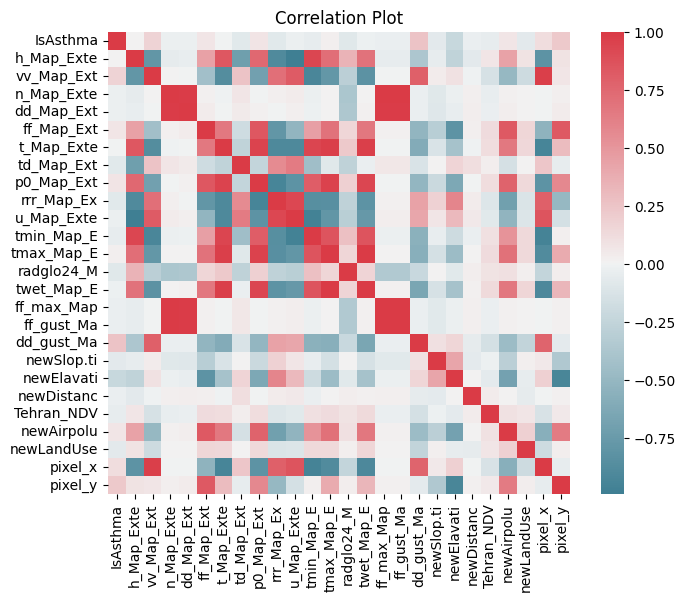

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt
dataset = pd.DataFrame(AsthematicNormalized.drop(columns='dd_max_Map'))

cor= dataset.corr(method='pearson')

fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [ ]:
cor= dataset.corr(method='pearson')

eva = cor['IsAsthma']

print(eva)

print(sorted(abs(eva)))

IsAsthma      1.000000
h_Map_Exte    0.007285
vv_Map_Ext    0.175129
n_Map_Exte   -0.023408
dd_Map_Ext   -0.025735
ff_Map_Ext    0.067638
t_Map_Exte    0.000061
td_Map_Ext   -0.074579
p0_Map_Ext    0.079572
rrr_Map_Ex   -0.074535
u_Map_Exte   -0.018181
tmin_Map_E   -0.047888
tmax_Map_E    0.028401
radglo24_M   -0.083124
twet_Map_E   -0.011093
ff_max_Map   -0.026003
dd_max_Map         NaN
ff_gust_Ma   -0.026002
dd_gust_Ma    0.254414
newSlop.ti   -0.066534
newElavati   -0.226712
newDistanc   -0.027349
Tehran_NDV   -0.047881
newAirpolu    0.072703
newLandUse   -0.072268
pixel_x       0.121001
pixel_y       0.225962
Name: IsAsthma, dtype: float64
[6.0931278196023194e-05, 0.007285019579352734, 0.011093422883589133, 0.018180806033977096, 0.023407662591430494, 0.025735107979544383, 0.026002049528146207, 0.02600252890801531, 0.027348894407964525, 0.028400812846492946, 0.047880819021657944, 0.0478878976519422, 0.06653418321345178, 0.06763823756341873, 0.07226827078892714, 0.07270281876345884, 

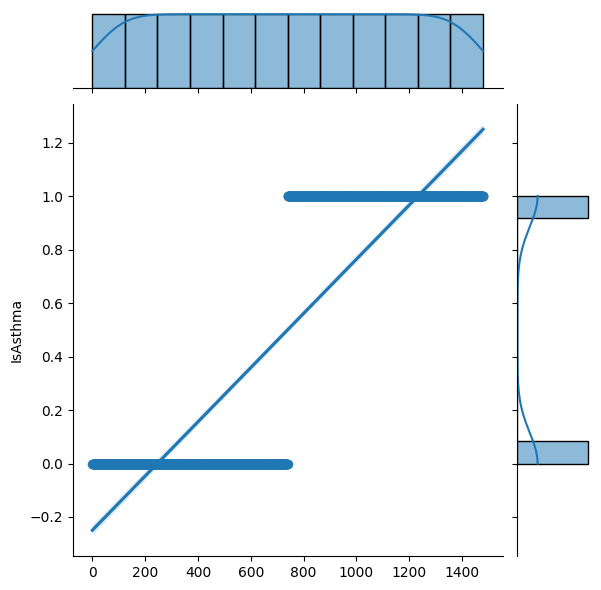

In [ ]:
sns.jointplot(data=dataset['IsAsthma'], kind="reg");

## Split Data

In [ ]:
data_np = dataset.to_numpy()
Y = data_np[:,0].reshape((dataset.shape[0], 1))   # Target : (291, 1)
X = data_np[:,1:]                    # Features : (291, 11)

X.shape

(1480, 26)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print("[INFO] x_train size: {}".format(X_train.shape))
print("[INFO] y_train size: {}".format(y_train.shape))
print("[INFO] x_test size: {}".format(X_test.shape))
print("[INFO] y_test size: {}".format(y_test.shape))

[INFO] x_train size: (1036, 26)
[INFO] y_train size: (1036, 1)
[INFO] x_test size: (444, 26)
[INFO] y_test size: (444, 1)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def showPrecisition(dataset,Y,y_train,y_test,pred_Tr,pred_Te,pred_MOdel,name):
    RMSE_Tr = np.sqrt(mean_squared_error(y_train,pred_Tr))
    R2_Tr = r2_score(y_train,pred_Tr)
    r_Tr = np.corrcoef(y_train.T,np.reshape(pred_Tr, (pred_Tr.shape[0],1)).T)

    RMSE_Te = np.sqrt(mean_squared_error(y_test,pred_Te))
    R2_Te = r2_score(y_test,pred_Te)
    r_Te = np.corrcoef(y_test.T,np.reshape(pred_Te, (pred_Te.shape[0],1)).T)

    RMSE_Al = np.sqrt(mean_squared_error(Y,pred_MOdel))
    R2_Al = r2_score(Y,pred_MOdel)
    r_Al = np.corrcoef(Y.T,np.reshape(pred_MOdel, (pred_MOdel.shape[0],1)).T)

    print('All: ', 'R2', R2_Al, 'RMSE:', RMSE_Al ,'Correlation:', r_Al[0][1])
    print('Train: ', 'R2', R2_Tr, 'RMSE:', RMSE_Tr ,'Correlation:', r_Tr[0][1])
    print('Test: ', 'R2',R2_Te, 'RMSE:',RMSE_Te, 'Correlation:', r_Te[0][1])
    print('                              ')
    print(f'****************************** {name}')
    print('                              ')

## RF and XGBOOST

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score
from math import sqrt

estimators = [5, 20, 50, 100, 250, 500, 1000]
for n in estimators:
    model_RFR = RFR().fit(X_train ,np.ravel(y_train))
    pred_Te = model_RFR.predict(X_test)
    pred_Tr = model_RFR.predict(X_train)
    pred_RFR = model_RFR.predict(X)

    RMSE_Tr = sqrt(mean_squared_error(y_train,pred_Tr))
    R2_Tr = r2_score(y_train,pred_Tr)
    r_Tr = np.corrcoef(y_train.T,np.reshape(pred_Tr, (pred_Tr.shape[0],1)).T)

    RMSE_Te = sqrt(mean_squared_error(y_test,pred_Te))
    R2_Te = r2_score(y_test,pred_Te)
    r_Te = np.corrcoef(y_test.T,np.reshape(pred_Te, (pred_Te.shape[0],1)).T)

    RMSE_Al = sqrt(mean_squared_error(Y,pred_RFR))
    R2_Al = r2_score(Y,pred_RFR)
    r_Al = np.corrcoef(Y.T,np.reshape(pred_RFR, (dataset.shape[0],1)).T)

    print('All: ', 'R2', R2_Al, 'RMSE:', RMSE_Al ,'Correlation:', r_Al[0][1])
    print('Train: ', 'R2', R2_Tr, 'RMSE:', RMSE_Tr ,'Correlation:', r_Tr[0][1])
    print('Test: ', 'R2',R2_Te, 'RMSE:',RMSE_Te, 'Correlation:', r_Te[0][1])
    print('                              ')
    print(f'****************************** {n}')
    print('                              ')

All:  R2 0.6513513513513514 RMSE: 0.2952323867094567 Correlation: 0.82594796966236
Train:  R2 1.0 RMSE: 0.0 Correlation: 0.9999999999999998
Test:  R2 -0.16225649350649363 RMSE: 0.5390181263561927 Correlation: 0.4199668648135499
                              
****************************** 5
                              
All:  R2 0.6513513513513514 RMSE: 0.2952323867094567 Correlation: 0.82594796966236
Train:  R2 1.0 RMSE: 0.0 Correlation: 0.9999999999999998
Test:  R2 -0.16225649350649363 RMSE: 0.5390181263561927 Correlation: 0.41996686481354994
                              
****************************** 20
                              
All:  R2 0.6513513513513514 RMSE: 0.2952323867094567 Correlation: 0.8258031149524097
Train:  R2 1.0 RMSE: 0.0 Correlation: 0.9999999999999998
Test:  R2 -0.16225649350649363 RMSE: 0.5390181263561927 Correlation: 0.41928537122775295
                              
****************************** 50
                              
All:  R2 0.65405405405405

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
# MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=10000)
mlp.fit(X_train, np.ravel(y_train))
pred_Te_mlp = mlp.predict(X_test)
pred_Tr_mlp = mlp.predict(X_train)
pred_mlp = mlp.predict(X)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, np.ravel(y_train))
pred_Te_rf = rf.predict(X_test)
pred_Tr_rf = rf.predict(X_train)
pred_rf = rf.predict(X)

# XGBoost Classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
pred_Te_xgb = xgb_model.predict(X_test)
pred_Tr_xgb = xgb_model.predict(X_train)
pred_xgb = xgb_model.predict(X)

# Calculate accuracies
mlp_accuracy = accuracy_score(y_test, pred_Te_mlp)
rf_accuracy = accuracy_score(y_test, pred_Te_rf)
xgb_accuracy = accuracy_score(y_test, pred_Te_xgb)

print('MLP Accuracy:', mlp_accuracy)
print('Random Forest Accuracy:', rf_accuracy)
print('XGBoost Accuracy:', xgb_accuracy)

showPrecisition(dataset, Y,y_train,y_test,pred_Tr_mlp,pred_Te_mlp,pred_mlp,'mlp_preds')
showPrecisition(dataset, Y,y_train,y_test,pred_Tr_rf,pred_Te_rf,pred_rf,'rf_preds')
showPrecisition(dataset, Y,y_train,y_test,pred_Tr_xgb,pred_Te_xgb,pred_xgb,'mlp_preds')



MLP Accuracy: 0.7027027027027027
Random Forest Accuracy: 0.7319819819819819
XGBoost Accuracy: 0.704954954954955
All:  R2 -0.09189189189189184 RMSE: 0.5224681549845627 Correlation: 0.45517926213364895
Train:  R2 -0.050208706022659255 RMSE: 0.5123946355576554 Correlation: 0.475929467417291
Test:  R2 -0.1892857142857145 RMSE: 0.5452497568062706 Correlation: 0.40653015388881586
                              
****************************** mlp_preds
                              
All:  R2 0.6783783783783783 RMSE: 0.2835584691124661 Correlation: 0.8395948255838965
Train:  R2 1.0 RMSE: 0.0 Correlation: 0.9999999999999998
Test:  R2 -0.072159090909091 RMSE: 0.517704566348432 Correlation: 0.46593203246538445
                              
****************************** rf_preds
                              
All:  R2 0.645945945945946 RMSE: 0.29751220733528483 Correlation: 0.8233707709832416
Train:  R2 1.0 RMSE: 0.0 Correlation: 0.9999999999999998
Test:  R2 -0.18027597402597406 RMSE: 0.543180490

## MLP

In [ ]:
import keras
from keras import backend as K

def threshold_binary_accuracy(y_true, y_pred):
    return K.mean(K.equal(y_true, K.round(y_pred)))



In [ ]:
!pip install scikeras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
def create_baseline():
  # Define the MLP model
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(26,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
   ])

  # Compile the model
  model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', keras.metrics.BinaryAccuracy(threshold=.7),keras.metrics.AUC(name='auc'),metrics.Precision()])
  return model
# evaluate model with standardized dataset
estimator = KerasClassifier(model=create_baseline, epochs=100, batch_size=42, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, Y, cv=kfold)

Epoch 1/100
32/32 [==============================] - 53s 2s/step - loss: 0.6860 - accuracy: 0.6051 - binary_accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6764 - accuracy: 0.6396 - binary_accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6621 - accuracy: 0.6562 - binary_accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6414 - accuracy: 0.6674 - binary_accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6276 - accuracy: 0.6667 - binary_accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6090 - accuracy: 0.6884 - binary_accuracy: 0.5015
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6053 - accuracy: 0.6839 - binary_accuracy: 0.5323
Epoch 8/100
32/32 [==============================] - 2s 54ms/step - loss: 0.6036 - accuracy: 0.6742 - binary_accuracy: 0.5511

KeyboardInterrupt: ignored

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow import keras
from keras import layers
# Define the MLP model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(26,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
callback = keras.callbacks.EarlyStopping(monitor='loss',
    min_delta=0.01,
    patience=15,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=300)
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',keras.metrics.BinaryAccuracy(threshold=.7),keras.metrics.AUC(name='auc'),keras.metrics.Precision()])

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=7,callbacks=[callback], verbose= 1)




Epoch 1/500
148/148 [==============================] - 3s 3ms/step - loss: 0.6769 - accuracy: 0.5975 - binary_accuracy: 0.5019 - auc: 0.6182 - precision_6: 0.5747
Epoch 2/500
148/148 [==============================] - 0s 3ms/step - loss: 0.6495 - accuracy: 0.6264 - binary_accuracy: 0.5029 - auc: 0.6743 - precision_6: 0.6238
Epoch 3/500
148/148 [==============================] - 0s 2ms/step - loss: 0.6302 - accuracy: 0.6689 - binary_accuracy: 0.5270 - auc: 0.7027 - precision_6: 0.6531
Epoch 4/500
148/148 [==============================] - 0s 2ms/step - loss: 0.6179 - accuracy: 0.6622 - binary_accuracy: 0.5338 - auc: 0.7110 - precision_6: 0.6487
Epoch 5/500
148/148 [==============================] - 0s 2ms/step - loss: 0.6150 - accuracy: 0.6602 - binary_accuracy: 0.5512 - auc: 0.7129 - precision_6: 0.6464
Epoch 6/500
148/148 [==============================] - 0s 2ms/step - loss: 0.5998 - accuracy: 0.6728 - binary_accuracy: 0.5811 - auc: 0.7337 - precision_6: 0.6606
Epoch 7/500
148/148 [=

In [ ]:
modelPath = '/content/drive/My Drive/Models/'
# Save the model
model.save(modelPath+"MLP.h5")
# Evaluate the model
test_loss, test_acc, banary_acc,auc, precision = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
print('binary accuracy:', banary_acc)
print('auc:', auc)
print('precision accuracy:', precision)

# Make predictions
pred_Te_mlp = np.round(model.predict(X_test))
pred_Tr_mlp = np.round(model.predict(X_train))
pred_mlp = np.round(model.predict(X))

14/14 [==============================] - 0s 4ms/step - loss: 0.6918 - accuracy: 0.7072 - binary_accuracy: 0.6667 - auc: 0.7454 - precision_6: 0.6958
Test loss: 0.6918240785598755
Test accuracy: 0.707207202911377
binary accuracy: 0.6666666865348816
auc: 0.7453733086585999
precision accuracy: 0.6958333253860474
47/47 [==============================] - 0s 2ms/step


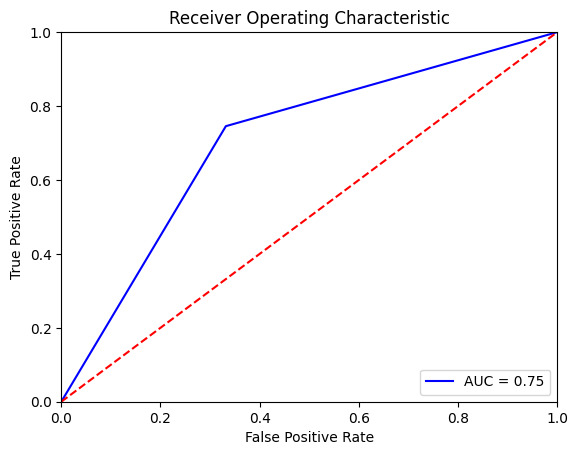

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test, np.round(pred_Te_mlp))
roc_auc = auc
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
# Make predictions
m = keras.metrics.BinaryAccuracy()
m.update_state(y_test, pred_Te_mlp)
m.result().numpy()

showPrecisition(X, Y,y_train,y_test,pred_Tr_mlp,pred_Te_mlp,pred_mlp,'mlp_preds')
print('binnary accuracy: ',m.result().numpy())
recall = recall_score(y_test, pred_Te_mlp)
f1 = f1_score(y_test, pred_Te_mlp)
# Print the evaluation metrics
print("Recall:", recall)
print("F1 Score:", f1)

All:  R2 0.21081081081081077 RMSE: 0.44418160396092193 Correlation: 0.6082915283995086
Train:  R2 0.37450805008944554 RMSE: 0.3954372976473721 Correlation: 0.6914336379350144
Test:  R2 -0.17126623376623384 RMSE: 0.5411033106466757 Correlation: 0.4150673485578065
                              
****************************** mlp_preds
                              
binnary accuracy:  0.7072072


In [ ]:
ExportedJpegURL =  '/content/drive/My Drive/Exported_Jpeg/'
tempPath = '/content/drive/My Drive/tempFile/'

def plotAccuracy(cvc):
    t = cvc.index
    #headerList =cvc.columns.tolist()
    fig, axes = plt.subplots(5, sharex=False, sharey=False)
    fig.set_figheight(10)
    fig.set_figwidth(15)
    #fig.supylabel('ug/m3', y=0.15, fontsize=14)
    fig.suptitle("MLP ", fontsize=16)
    axes[0].plot(t, cvc['accuracy'], 'r' )
    axes[0].set_title("Accuracy", loc='center', color='black' )
    axes[1].plot(t, cvc['loss'], 'y')
    axes[1].set_title("Binary crossentropy", loc='center', color='black' )
    axes[2].plot(t, cvc['binary_accuracy'], 'b' )
    axes[2].set_title("Binary accuracy", loc='center', color='black' )
    axes[3].plot(t, cvc['Precision'], 'g' )
    axes[3].set_title("Precision", loc='center', color='black' )
    axes[4].plot(t, cvc['AUC'], 'r' )
    axes[4].set_title("AUC", loc='center', color='black' )

    plt.savefig(ExportedJpegURL+ 'MLP_Accuracy.jpg')

In [ ]:
from keras.models import load_model
modelPath = '/content/drive/My Drive/Models/'

# Load the saved model
MLPmodel = load_model(modelPath+"MLP.h5")

In [ ]:
MLPmodel

In [ ]:
cvc = pd.DataFrame(columns=['A'])
cvc['accuracy'] = MLPmodel.history.history['accuracy']
cvc['loss'] = MLPmodel.history.history['loss']
cvc['binary_accuracy'] = MLPmodel.history.history['binary_accuracy']
cvc['Precision'] = MLPmodel.history.history.loc(3)
cvc['AUC'] = MLPmodel.history.history['auc']

plotAccuracy(cvc)
cvc.to_csv(tempPath + 'MLP_outPut_history.csv')


AttributeError: ignored

In [ ]:
cvc.plot()

In [ ]:
m = keras.metrics.BinaryAccuracy()
m.update_state(y_test, pred_Te_mlp)
m.result().numpy()


0.704955

In [ ]:
import rasterio
from rasterio.plot import reshape_as_raster, reshape_as_image

dataset = rasterio.open(TifExportUrl + 'stacked_raster_normalized.tif').read()

stack = reshape_as_image(dataset)
stack[np.isnan(stack)] = 0
stack.shape

In [ ]:

stack_re = np.reshape(stack ,(1461 * 2351, 26))

stack_re.shape

(3434811, 26)

In [ ]:
pred_Stack_MLP = model.predict(stack_re)

107338/107338 [==============================] - 478s 4ms/step


In [ ]:
Result_rfr = np.reshape(pred_Stack_MLP ,(1461, 2351))

In [ ]:
Result_rfr.shape


(1461, 2351)

In [ ]:
Result_rfr

array([[1.59027950e-05, 6.18540100e-04, 3.50588948e-06, ...,
        1.83242074e-20, 9.07059118e-20, 4.76130330e-20],
       [1.85662957e-05, 6.40284619e-04, 3.82501776e-06, ...,
        2.10722145e-20, 9.20320584e-21, 2.17462616e-20],
       [3.55832526e-06, 6.41022270e-05, 3.39419353e-06, ...,
        1.57393116e-20, 6.14580655e-21, 1.79211119e-20],
       ...,
       [7.25053109e-16, 1.36643652e-15, 1.83323637e-15, ...,
        5.80865540e-24, 9.21956649e-24, 1.20956137e-23],
       [2.08536378e-15, 5.85341059e-16, 2.04057966e-15, ...,
        9.24273692e-24, 1.22752705e-23, 1.30704967e-23],
       [2.20592981e-15, 4.69911486e-16, 1.53445746e-15, ...,
        1.39216082e-21, 1.57372695e-20, 1.63760985e-20]], dtype=float32)

<ipython-input-123-40310a6c8c37>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  new_inferno = cm.get_cmap('RdYlGn', 5)


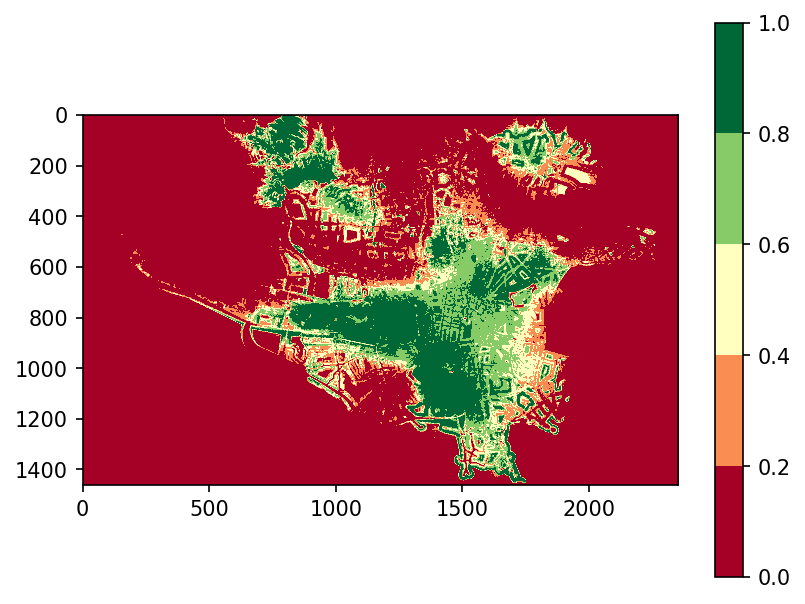

In [ ]:
from matplotlib import cm
new_inferno = cm.get_cmap('RdYlGn', 5)
plt.figure(dpi = 150)
plt.imshow(Result_rfr, cmap = new_inferno)
plt.colorbar()
plt.show()

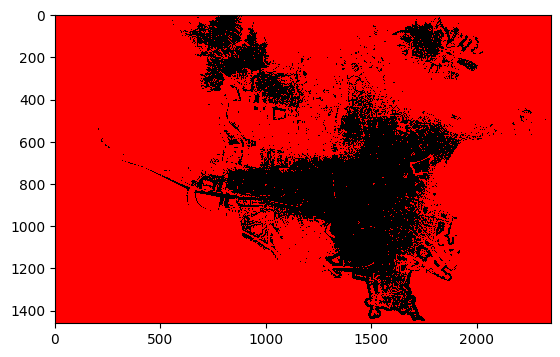

In [ ]:
import matplotlib as mpl
fig, ax = plt.subplots()

# define the colors
cmap = mpl.colors.ListedColormap(['r', 'k'])

# create a normalize object the describes the limits of
# each color
bounds = [0., 0.5, 1.]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# plot it
ax.imshow(Result_rfr, interpolation='none', cmap=cmap, norm=norm)

In [ ]:
from osgeo import gdal
import numpy as np

# List of input raster files to stack
#file_list

# Open the first input raster to get the metadata
first_dataset = gdal.Open(TifExportUrl + 'stacked_raster_normalized.tif', gdal.GA_ReadOnly)
driver = gdal.GetDriverByName('GTiff')

# Create the output dataset for the stacked raster
# add two layer for add x and y coordinates
output_dataset = driver.Create(TifExportUrl + 'MLP.tif', first_dataset.RasterXSize, first_dataset.RasterYSize,
                              1, first_dataset.GetRasterBand(1).DataType)

# Copy projection information from the first dataset
output_dataset.SetProjection(first_dataset.GetProjection())

# Set geotransform
output_dataset.SetGeoTransform(first_dataset.GetGeoTransform())
# Initialize list for stacked arrays
stacked_array_list = []
band_array = Result_rfr
output_band = output_dataset.GetRasterBand(1)
output_band.WriteArray(band_array)
output_band.FlushCache()
src = None
output_dataset.FlushCache()
output_dataset = None
# Open the first input raster to get the metadata
mlpRadter = gdal.Open(TifExportUrl + 'MLP.tif', gdal.GA_ReadOnly)
print(mlpRadter.ReadAsArray().shape)

(1461, 2351)


In [ ]:
mlpRadter.ReadAsArray()

array([[1.59027950e-05, 6.18540100e-04, 3.50588948e-06, ...,
        1.83242074e-20, 9.07059118e-20, 4.76130330e-20],
       [1.85662957e-05, 6.40284619e-04, 3.82501776e-06, ...,
        2.10722145e-20, 9.20320584e-21, 2.17462616e-20],
       [3.55832526e-06, 6.41022270e-05, 3.39419353e-06, ...,
        1.57393116e-20, 6.14580655e-21, 1.79211119e-20],
       ...,
       [7.25053109e-16, 1.36643652e-15, 1.83323637e-15, ...,
        5.80865540e-24, 9.21956649e-24, 1.20956137e-23],
       [2.08536378e-15, 5.85341059e-16, 2.04057966e-15, ...,
        9.24273692e-24, 1.22752705e-23, 1.30704967e-23],
       [2.20592981e-15, 4.69911486e-16, 1.53445746e-15, ...,
        1.39216082e-21, 1.57372695e-20, 1.63760985e-20]])

In [ ]:
TifExportUrl = '/content/drive/My Drive/Tif_Export/'
ShapefilesURL='/content/drive/My Drive/ShapeFiles/'
newcounties = gpd.read_file(ShapefilesURL+"Mahalat.shp")

In [ ]:
raster_pk = rasterio.open( TifExportUrl + 'MLP.tif')
out_image_pk, out_transform_pk = rasterio.mask.mask(raster_pk, newcounties.geometry.values, crop = True)


plot best model

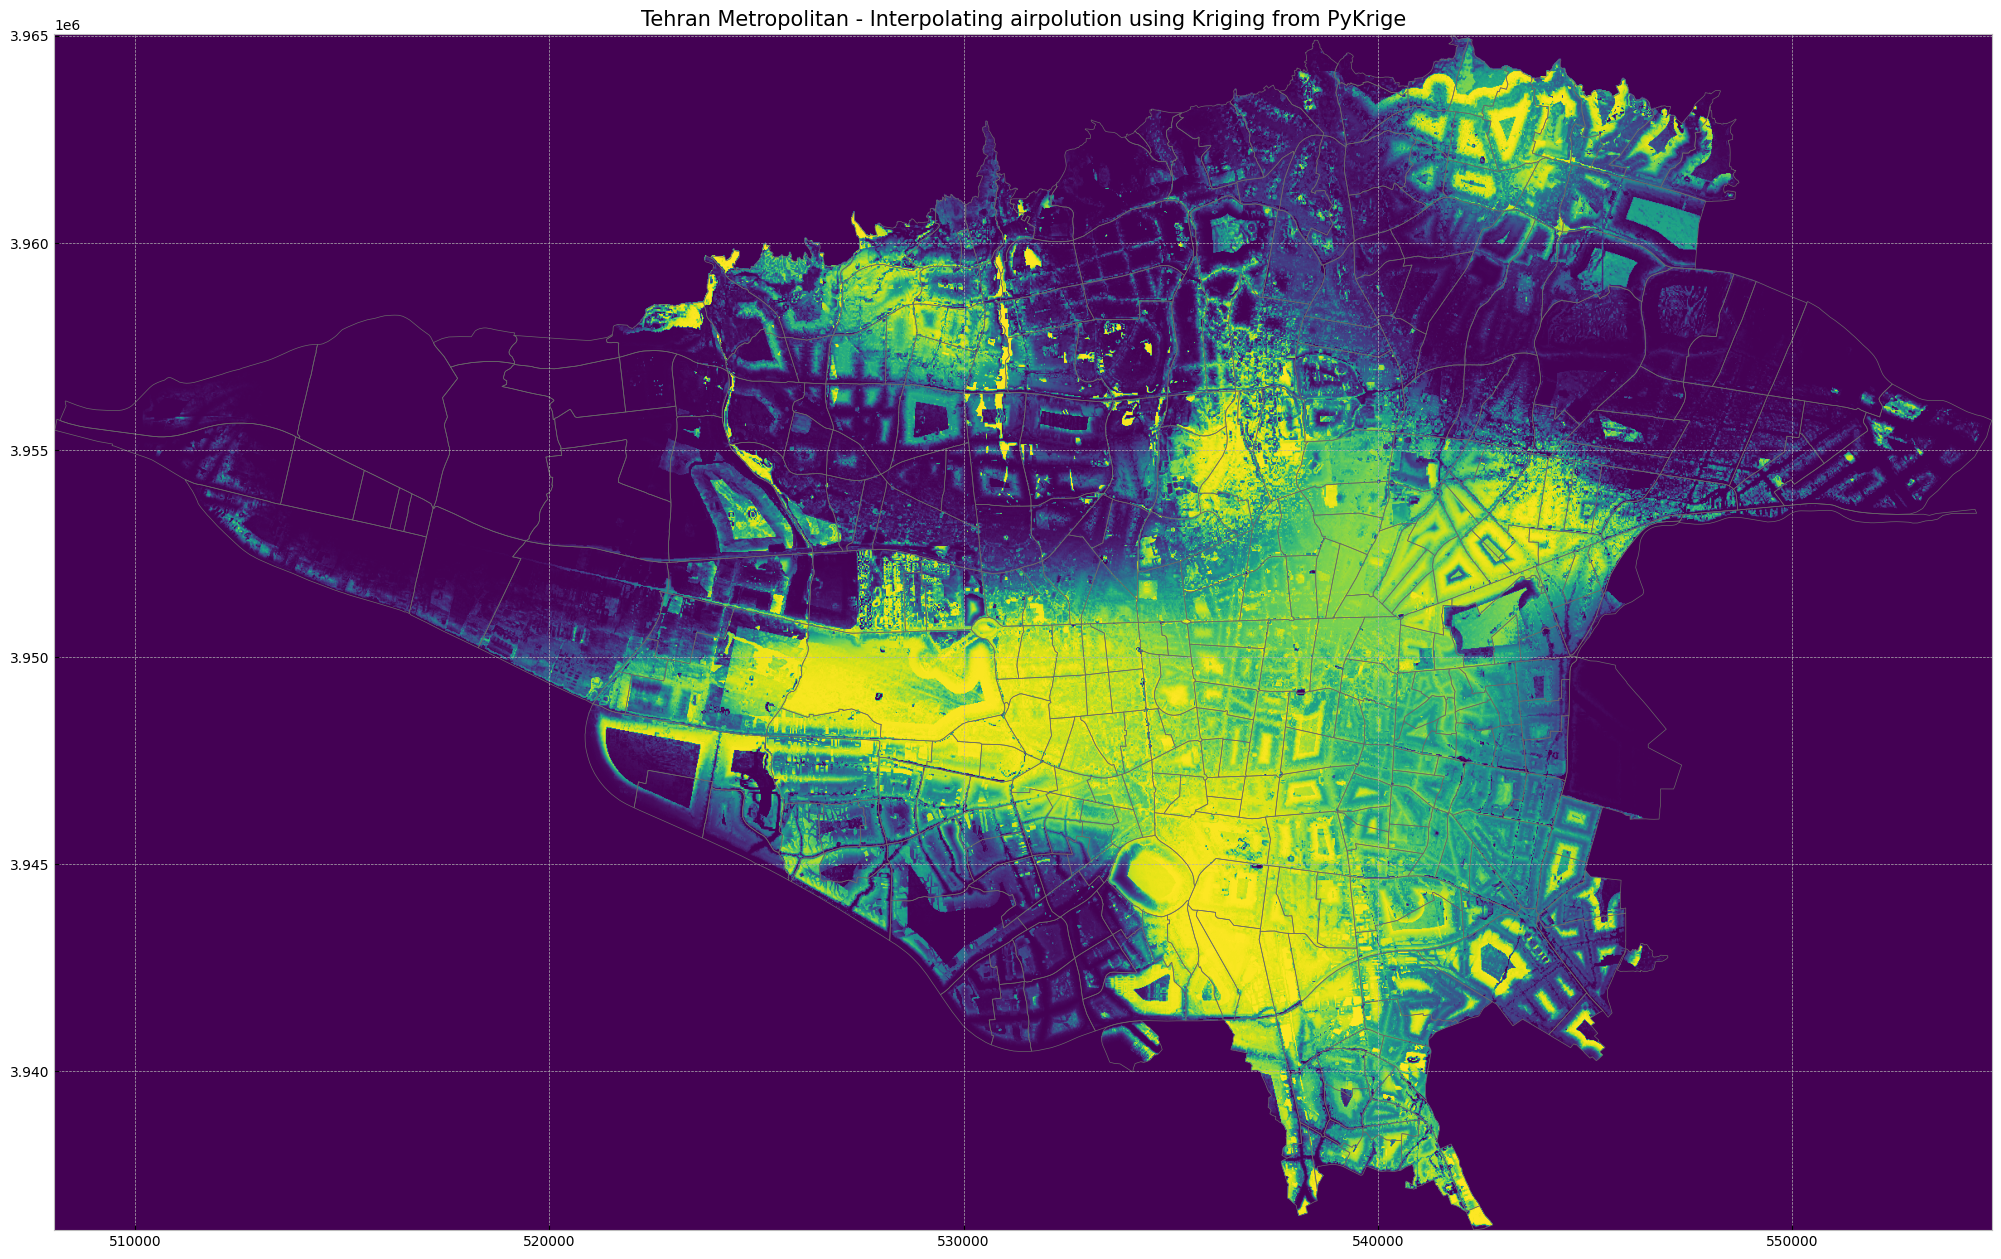

In [ ]:
import matplotlib.colors as clr
import matplotlib as mpl
# Open raster

#cmap = clr.LinearSegmentedColormap.from_list('cmap_name',  ['green','yellow','orange','red','purple','maroon'], N=100)

# Stylize plots
plt.style.use('bmh')

# Plot data
#fig, ax = plt.subplots(1, figsize = (25, 20))

#show(out_image_sk, ax = ax, transform = out_transform_sk, cmap = cmap, vmin=50, vmax=200 ,interpolation = 'nearest')

# Stylize plots
plt.style.use('bmh')

# Plot data
#plt.figure(figsize=(25,20))
fig, ax = plt.subplots(1, figsize = (25, 20))
show(out_image_pk, ax = ax, transform = out_transform_pk)
#ax.plot(x_airpolution, y_airpolution, 'k.', markersize = 20, alpha = 0.5)
newcounties.plot(ax = ax, color = 'none', edgecolor = 'dimgray')
#plt.gca().invert_yaxis()

# Set title
ax.set_title('Tehran Metropolitan - Interpolating airpolution using Kriging from PyKrige', fontdict = {'fontsize': '15', 'fontweight' : '3'})

# Display plot
plt.show()

In [ ]:
#CropMap
cropMaps(raster_pk,newcounties,"MLPCROP")

In [ ]:
Raster = gdal.Open(TifExportUrl + 'MLPCROP.tif', gdal.GA_ReadOnly)
RasterArray = Raster.ReadAsArray()
BinaryArray = np.where(RasterArray > 0.5, 1, 0)
from osgeo import gdal
import numpy as np

# List of input raster files to stack
#file_list

# Open the first input raster to get the metadata
first_dataset = gdal.Open(TifExportUrl + 'stacked_raster_normalized.tif', gdal.GA_ReadOnly)
driver = gdal.GetDriverByName('GTiff')

# Create the output dataset for the stacked raster
# add two layer for add x and y coordinates
output_dataset = driver.Create(TifExportUrl + 'MLP_Binary.tif', first_dataset.RasterXSize, first_dataset.RasterYSize,
                              1, first_dataset.GetRasterBand(1).DataType)

# Copy projection information from the first dataset
output_dataset.SetProjection(first_dataset.GetProjection())

# Set geotransform
output_dataset.SetGeoTransform(first_dataset.GetGeoTransform())
# Initialize list for stacked arrays
stacked_array_list = []
band_array = BinaryArray
output_band = output_dataset.GetRasterBand(1)
output_band.WriteArray(band_array)
output_band.FlushCache()
src = None
output_dataset.FlushCache()
output_dataset = None
# Open the first input raster to get the metadata
mlpRadter = gdal.Open(TifExportUrl + 'MLP_Binary.tif', gdal.GA_ReadOnly)
print(mlpRadter.ReadAsArray().shape)

(1461, 2351)


## SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'class_weight': ['balanced']
}
svmModel_grid = GridSearchCV(estimator=SVC(random_state=1234, probability=True), param_grid=param_grid_svm, verbose=2, cv=10, n_jobs=-1)
svmModel_grid.fit(X_train, y_train)
print(svmModel_grid.best_estimator_)
#Fitting 10 folds for each of 64 candidates, totalling 640 fits

Fitting 10 folds for each of 64 candidates, totalling 640 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, class_weight='balanced', gamma=1, probability=True,
    random_state=1234)


SVC(C=1, class_weight='balanced', gamma=0.001, probability=True,
    random_state=1234)

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

# Assuming X is your input features (stacked image) and y is the corresponding binary labels

# Initialize an SVM classifier
clf = svm.SVC(C=100, class_weight='balanced', gamma=1, probability=True,
    random_state=1234)

# Train the SVM model
clf.fit(X_train, y_train)

# Predict labels for the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
loss = log_loss(y_test, y_pred)
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Binary crossentropy:", loss)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7319819819819819
Precision: 0.7011494252873564
Recall: 0.8169642857142857
F1 Score: 0.7546391752577319
Binary crossentropy: 9.660348543479598


In [ ]:
RMSE_Al = np.sqrt(mean_squared_error(y_test, y_pred))
R2_Al = r2_score(y_test, y_pred)
r_Al = np.corrcoef(y_test.T,np.reshape(y_pred, (y_pred.shape[0],1)).T)


print('test: ', 'R2', R2_Al, 'RMSE:', RMSE_Al ,'Correlation:', r_Al[0][1])

test:  R2 -0.072159090909091 RMSE: 0.517704566348432 Correlation: 0.4697048695759808


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

[[142  78]
 [ 41 183]] : is the confusion matrix
0.7319819819819819 : is the accuracy score
0.7011494252873564 : is the precision score
0.8169642857142857 : is the recall score
0.7546391752577319 : is the f1 score


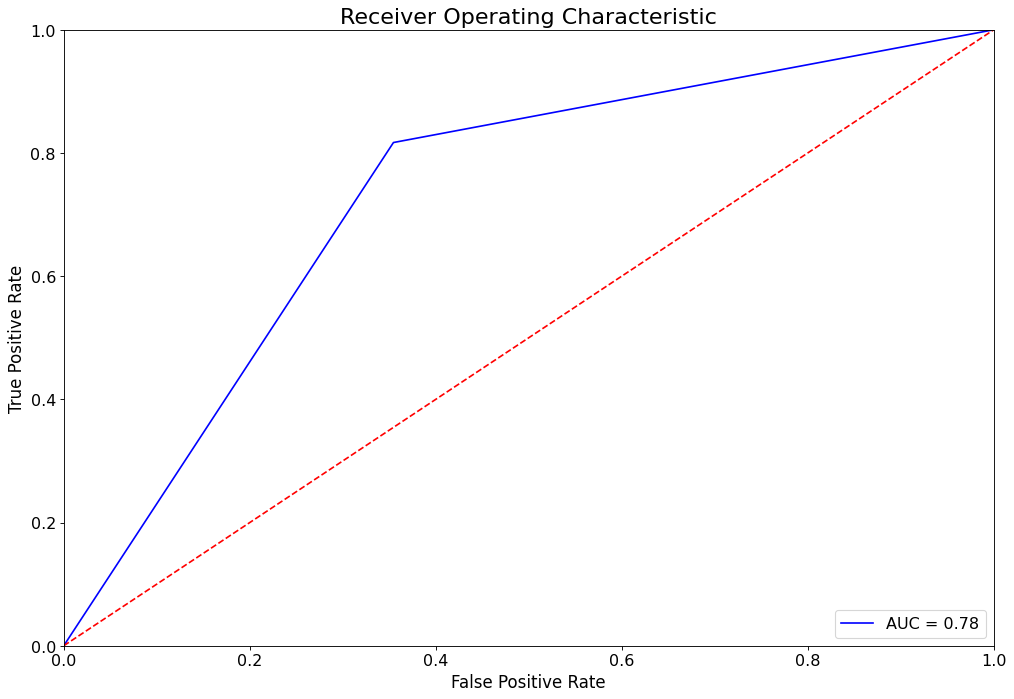

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, threshold = roc_curve(y_test, np.round(y_pred))
roc_auc =  roc_auc_score(y_test, y_pred_proba)
# method I: plt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=80)
plt.title('Receiver Operating Characteristic', fontsize=20)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
# title and labels, setting initial sizes

plt.figsize=(25, 20)
plt.show()

In [ ]:
import rasterio
from rasterio.plot import reshape_as_raster, reshape_as_image

dataset = rasterio.open(TifExportUrl + 'stacked_raster_normalized.tif').read()

stack = reshape_as_image(dataset)


In [ ]:
stack[np.isnan(stack)] = 0

In [ ]:
stack.shape

(1461, 2351, 26)

In [ ]:

stack_re = np.reshape(stack ,(1461 * 2351, 26))

stack_re.shape

(3434811, 26)

In [ ]:
pred_Stack_clf = clf.predict(stack_re)

In [ ]:
Result_rfr = np.reshape(pred_Stack_clf ,(1461, 2351))

In [ ]:
Result_rfr.shape


(1461, 2351)

In [ ]:
Result_rfr

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<ipython-input-31-40310a6c8c37>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  new_inferno = cm.get_cmap('RdYlGn', 5)


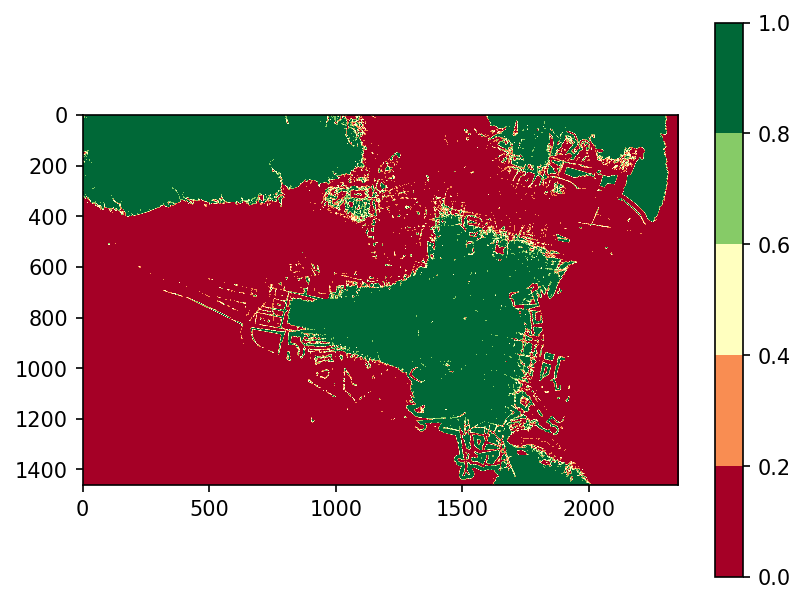

In [ ]:
from matplotlib import cm
new_inferno = cm.get_cmap('RdYlGn', 5)
plt.figure(dpi = 150)
plt.imshow(Result_rfr, cmap = new_inferno)
plt.colorbar()
plt.show()

In [ ]:
from osgeo import gdal
import numpy as np

# List of input raster files to stack
#file_list

# Open the first input raster to get the metadata
first_dataset = gdal.Open(TifExportUrl + 'stacked_raster_normalized.tif', gdal.GA_ReadOnly)
driver = gdal.GetDriverByName('GTiff')

# Create the output dataset for the stacked raster
# add two layer for add x and y coordinates
output_dataset = driver.Create(TifExportUrl + 'SVM.tif', first_dataset.RasterXSize, first_dataset.RasterYSize,
                              1, first_dataset.GetRasterBand(1).DataType)

# Copy projection information from the first dataset
output_dataset.SetProjection(first_dataset.GetProjection())

# Set geotransform
output_dataset.SetGeoTransform(first_dataset.GetGeoTransform())
# Initialize list for stacked arrays
stacked_array_list = []
band_array = Result_rfr
output_band = output_dataset.GetRasterBand(1)
output_band.WriteArray(band_array)
output_band.FlushCache()
src = None
output_dataset.FlushCache()
output_dataset = None
# Open the first input raster to get the metadata
mlpRadter = gdal.Open(TifExportUrl + 'SVM.tif', gdal.GA_ReadOnly)
print(mlpRadter.ReadAsArray().shape)

(1461, 2351)


In [ ]:
TifExportUrl = '/content/drive/My Drive/Tif_Export/'
ShapefilesURL='/content/drive/My Drive/ShapeFiles/'
newcounties = gpd.read_file(ShapefilesURL+"Mahalat.shp")

In [ ]:
raster_pk = rasterio.open( TifExportUrl + 'SVM.tif')
out_image_pk, out_transform_pk = rasterio.mask.mask(raster_pk, newcounties.geometry.values, crop = True)


plot best model

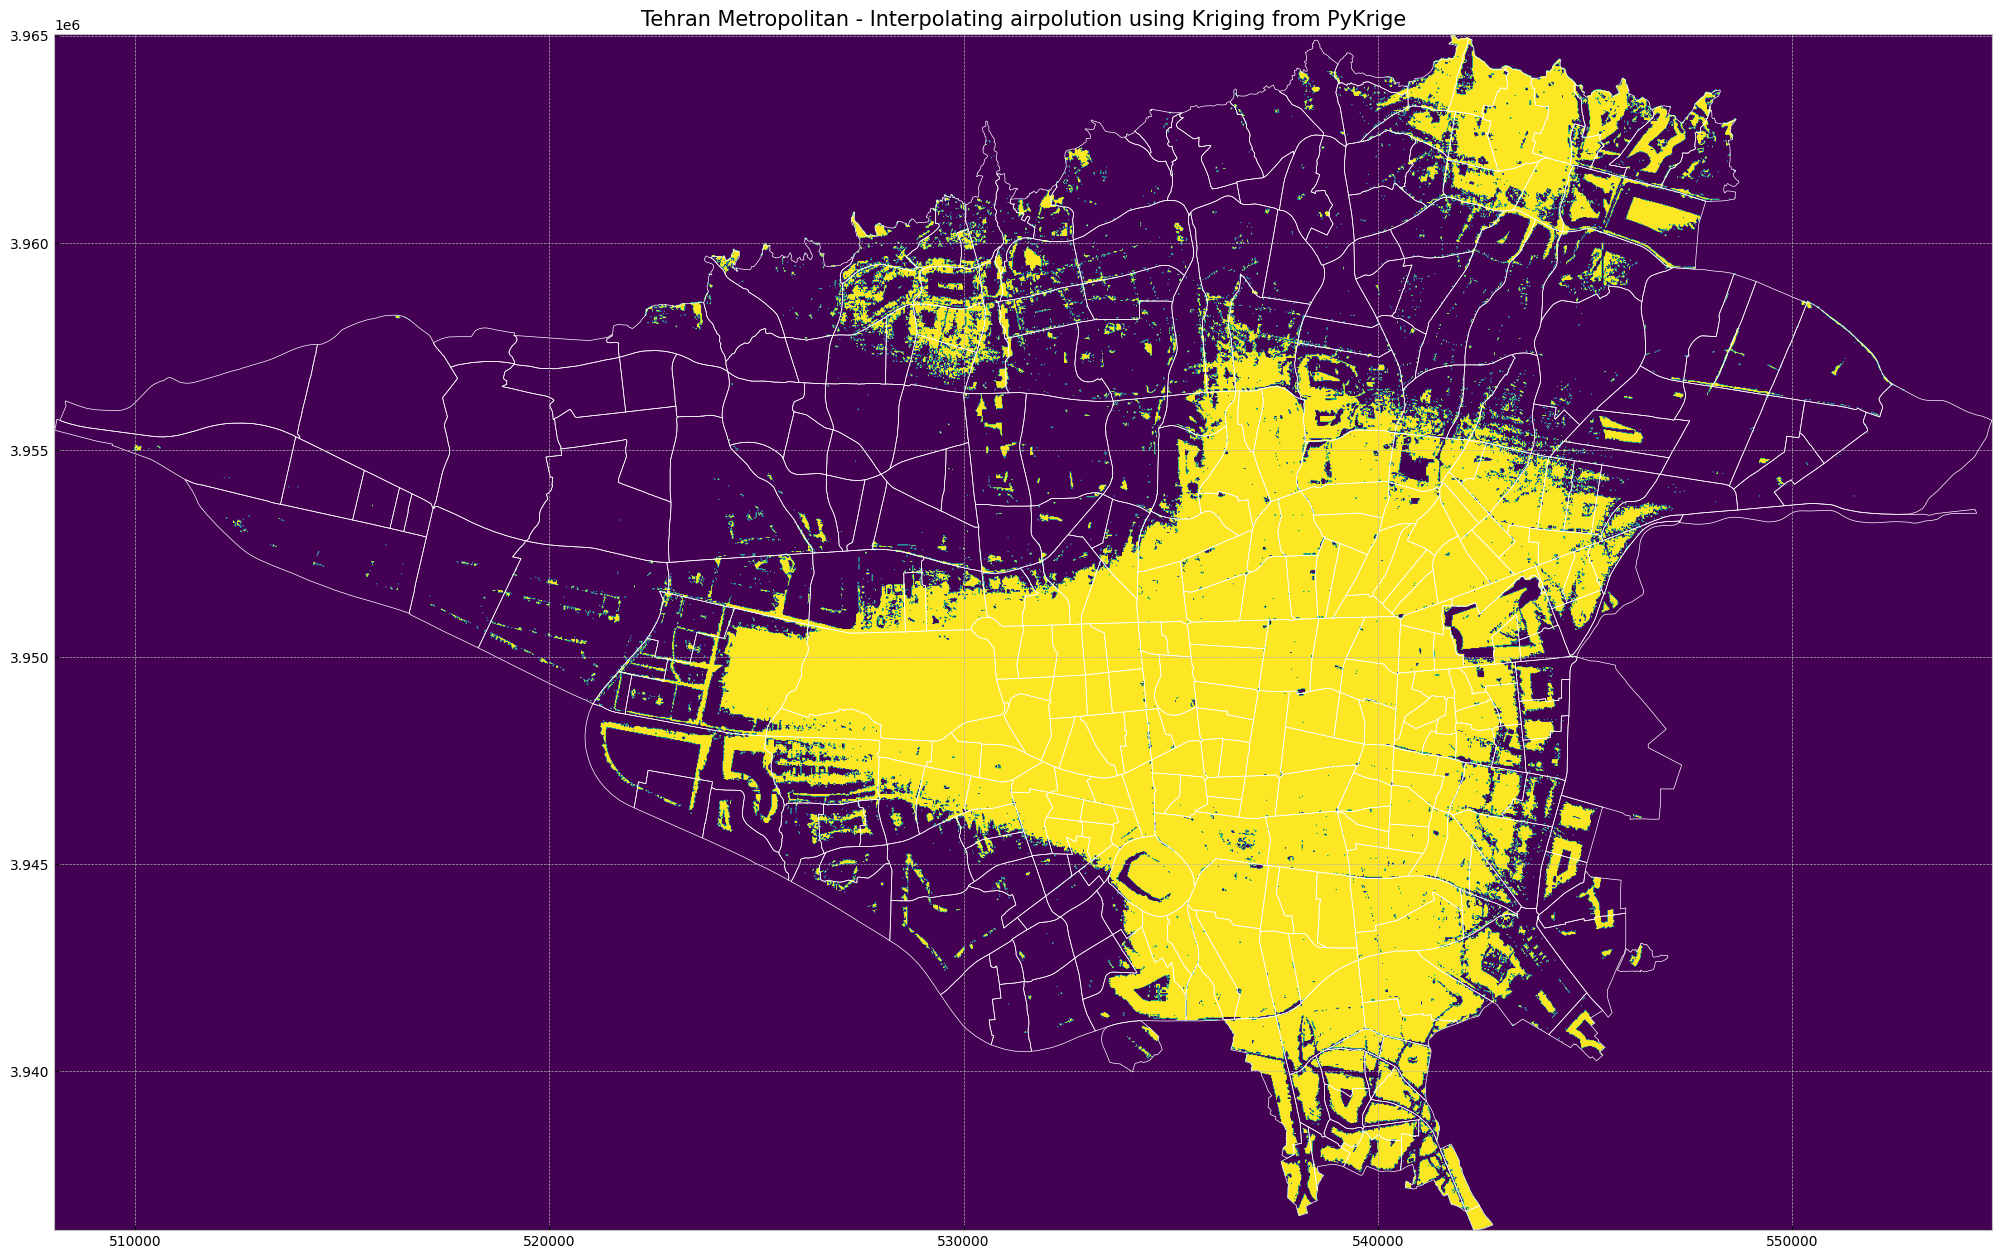

In [ ]:
import matplotlib.colors as clr
import matplotlib as mpl
# Open raster

#cmap = clr.LinearSegmentedColormap.from_list('cmap_name',  ['green','yellow','orange','red','purple','maroon'], N=100)

# Stylize plots
plt.style.use('bmh')

# Plot data
#fig, ax = plt.subplots(1, figsize = (25, 20))

#show(out_image_sk, ax = ax, transform = out_transform_sk, cmap = cmap, vmin=50, vmax=200 ,interpolation = 'nearest')

# Stylize plots
plt.style.use('bmh')

# Plot data
#plt.figure(figsize=(25,20))
fig, ax = plt.subplots(1, figsize = (25, 20))
show(out_image_pk, ax = ax, transform = out_transform_pk)
#ax.plot(x_airpolution, y_airpolution, 'k.', markersize = 20, alpha = 0.5)
newcounties.plot(ax = ax, color = 'none', edgecolor = 'white')
#plt.gca().invert_yaxis()

# Set title
ax.set_title('Tehran Metropolitan - Interpolating airpolution using Kriging from PyKrige', fontdict = {'fontsize': '15', 'fontweight' : '3'})

# Display plot
plt.show()

In [ ]:
#CropMap
cropMaps(raster_pk,newcounties,"SVMCROP")

## CNN

In [ ]:
import rasterio
from rasterio.plot import reshape_as_raster, reshape_as_image

stackPath = rasterio.open(TifExportUrl + 'stacked_raster_normalized.tif').read()

stack = reshape_as_image(stackPath)
stack[np.isnan(stack)] = 0
stack.shape

(1461, 2351, 26)

In [ ]:
height = 1461
width = 2351
depth = 26
patch_size = 13
cell_toBeAdd = patch_size//2

### create and learn model

In [ ]:
import geopandas as gpd
AsthematicSHPTrueValues = gpd.read_file (AsthemaricURL + 'AsmethicWithValues.shp')
dataset['pixel_x'] = AsthematicSHPTrueValues['pixel_x']
dataset['pixel_y'] = AsthematicSHPTrueValues['pixel_y']
dataset

IsAsthma  h_Map_Exte  vv_Map_Ext  n_Map_Exte  dd_Map_Ext  ff_Map_Ext  \
0            0    0.723744    0.368168    0.743858         1.0    0.596653   
1            0    0.461619    0.758035    0.743858         1.0    0.477426   
2            0    0.931490    0.121972    0.743858         1.0    0.448816   
3            0    0.555978    0.701599    0.743858         1.0    0.417477   
4            0    0.857890    0.494326    0.743858         1.0    0.301632   
...        ...         ...         ...         ...         ...         ...   
1475         1    0.466972    0.716572    0.743858         1.0    0.593921   
1476         1    0.467442    0.717465    0.743858         1.0    0.590433   
1477         1    0.469245    0.716083    0.743858         1.0    0.589696   
1478         1    0.439579    0.752310    0.743858         1.0    0.566473   
1479         1    0.439117    0.755177    0.743858         1.0    0.559674   

      t_Map_Exte  td_Map_Ext  p0_Map_Ext  rrr_Map_Ex  ...  ff_gust_Ma  \
0       0.905410    0.458071    0.797379    0.025455  ...     0.66845   
1       0.629396    0.475423    0.580633    0.337561  ...     0.66845   
2       0.946791    0.384998    0.721981    0.022905  ...     0.66845   
3       0.645272    0.375669    0.568028    0.308216  ...     0.66845   
4       0.751010    0.182028    0.583912    0.155869  ...     0.66845   
...          ...         ...         ...         ...  ...         ...   
1475    0.750738    0.600348    0.731704    0.199111  ...     0.66845   
1476    0.747768    0.596885    0.727723    0.202404  ...     0.66845   
1477    0.747839    0.593922    0.727269    0.201626  ...     0.66845   
1478    0.711548    0.608849    0.689909    0.254062  ...     0.66845   
1479    0.703802    0.600845    0.680396    0.262463  ...     0.66845   

      dd_gust_Ma  newSlop.ti  newElavati  newDistanc  Tehran_NDV  newAirpolu  \
0       0.706565    0.032383    0.067606    0.000000    0.404536    0.852860   
1       0.896765    0.021868    0.043380    0.000000    0.515283    0.353632   
2       0.653059    0.013795    0.150986    0.000000    0.507389    0.642409   
3       0.921005    0.032383    0.065352    0.158114    0.405428    0.394840   
4       0.907291    0.451392    0.295211    0.492443    0.403647    0.089038   
...          ...         ...         ...         ...         ...         ...   
1475    0.907371    0.043692    0.012958    0.838153    0.458775    0.695516   
1476    0.906990    0.021860    0.013521    0.776209    0.448888    0.696618   
1477    0.906993    0.093993    0.014648    0.550000    0.444352    0.700760   
1478    0.899752    0.021860    0.011831    0.158114    0.451945    0.582946   
1479    0.898443    0.000000    0.015211    0.100000    0.470857    0.566107   

      newLandUse  pixel_x  pixel_y  
0       1.000000    711.0    943.0  
1       0.216216   1742.0   1140.0  
2       0.394595    513.0    512.0  
3       0.216216   1623.0    949.0  
4       0.216216   1135.0    320.0  
...          ...      ...      ...  
1475    0.081081   1530.0   1396.0  
1476    0.216216   1536.0   1389.0  
1477    0.216216   1532.0   1385.0  
1478    0.275676   1664.0   1388.0  
1479    0.216216   1678.0   1373.0  

[1480 rows x 27 columns]

In [ ]:
import numpy as np
#dataset
# Dataset and parameters

#background_class = np.nan
# Determine the shape of the label array
#label_array = np.full((height, width), background_class)
# Create an empty list to store the patches
patchesISAsthma = []
patchesnotAsthma =  []

# Iterate over the DataFrame rows and mark the asthma points with the asthma class value
for _, row in dataset.iterrows():
    x = int(row['pixel_x'])
    y = int(row['pixel_y'])
    IsAsthma = int(row['IsAsthma'])
   # label_array[y, x]  = int(row['IsAsthma'])
    if(IsAsthma):
      patchesISAsthma.append(stack[y-cell_toBeAdd:y+cell_toBeAdd+1, x-cell_toBeAdd:x+cell_toBeAdd+1,:])
    else:
      patchesnotAsthma.append(stack[y-cell_toBeAdd:y+cell_toBeAdd+1, x-cell_toBeAdd:x+cell_toBeAdd+1,:])


# Reshape the label array to match the CNN input shape if needed
#label_arrayin3d = label_array.reshape((1, height, width))

# Perform any
#label_arrayin3d.astype('float32').reshape((-1,1))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Combine the two lists of 9x9 arrays
combined_features = patchesISAsthma + patchesnotAsthma

# Create the corresponding labels
labels = [1] * len(patchesISAsthma) + [0] * len(patchesnotAsthma)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_features, labels, test_size=0.2, random_state=42)




In [ ]:
# Reshape and normalize the data
X_train = np.array(X_train).reshape(len(X_train),X_train[0].shape[0], X_train[0].shape[1], X_train[0].shape[2])  # Assuming grayscale images, single channel
X_test = np.array(X_test).reshape(len(X_test),X_test[0].shape[0], X_test[0].shape[1], X_test[0].shape[2])
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
from tensorflow import keras
from keras import layers, metrics
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
# Create and compile the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(X_train[0].shape[0], X_train[0].shape[1], X_train[0].shape[2])))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','binary_accuracy',metrics.Precision(),keras.metrics.AUC(name='auc')])
callback = keras.callbacks.EarlyStopping(monitor='loss',
    min_delta=0.01,
    patience=15,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=200)
# Train the CNN model
history = model.fit(X_train, y_train, epochs=120, batch_size=100,callbacks =[callback])

# Evaluate the CNN model
loss, accuracy,binary_accuracy,auc, Precision = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)
print('Test binary_accuracy:', binary_accuracy)
print('auc:', auc)
print('Precision:', Precision)



Epoch 1/120
12/12 [==============================] - 1s 24ms/step - loss: 0.6884 - accuracy: 0.5465 - binary_accuracy: 0.5465 - precision_35: 0.5585 - auc: 0.5806
Epoch 2/120
12/12 [==============================] - 0s 22ms/step - loss: 0.6445 - accuracy: 0.6554 - binary_accuracy: 0.6554 - precision_35: 0.6357 - auc: 0.6773
Epoch 3/120
12/12 [==============================] - 0s 22ms/step - loss: 0.6260 - accuracy: 0.6731 - binary_accuracy: 0.6731 - precision_35: 0.6566 - auc: 0.6995
Epoch 4/120
12/12 [==============================] - 0s 35ms/step - loss: 0.6108 - accuracy: 0.6867 - binary_accuracy: 0.6867 - precision_35: 0.6701 - auc: 0.7202
Epoch 5/120
12/12 [==============================] - 0s 35ms/step - loss: 0.6088 - accuracy: 0.6976 - binary_accuracy: 0.6976 - precision_35: 0.6814 - auc: 0.7195
Epoch 6/120
12/12 [==============================] - 1s 49ms/step - loss: 0.5994 - accuracy: 0.6816 - binary_accuracy: 0.6816 - precision_35: 0.6579 - auc: 0.7297
Epoch 7/120
12/12 [===

In [ ]:
modelPath = '/content/drive/My Drive/Models/'
# Save the model
model.save(modelPath+"CNN2.h5")

In [ ]:
model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 11, 11, 32)        7520      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_28 (Flatten)        (None, 800)               0         
                                                                 
 dense_89 (Dense)            (None, 64)                51264     
                                                                 
 dense_90 (Dense)            (None, 1)                 65        
                                                                 
Total params: 58,849
Trainable params: 58,849
Non-trainable params: 0
_________________________________________________

In [ ]:

# Evaluate the CNN model
loss, accuracy,binary_accuracy,precision = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)
print('Test binary_accuracy:', binary_accuracy)
print('Test precision:', precision)


10/10 [==============================] - 0s 4ms/step - loss: 0.6536 - accuracy: 0.7027 - binary_accuracy: 0.7027 - precision_35: 0.6765 - auc: 0.7315


ValueError: ignored

In [ ]:

# Evaluate the CNN model
loss, accuracy,binary_accuracy,precision = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)
print('Test binary_accuracy:', binary_accuracy)
print('Test precision:', precision)




10/10 [==============================] - 1s 116ms/step - loss: 0.6074 - accuracy: 0.6689 - binary_accuracy: 0.6689 - precision_1: 0.6000
Test loss: 0.6073946952819824
Test accuracy: 0.6689189076423645
Test binary_accuracy: 0.6689189076423645
Test precision: 0.6000000238418579


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

pred_Te = np.round(model.predict(X_test))
RMSE_Te = np.sqrt(mean_squared_error(y_test,pred_Te))
R2_Te = r2_score(y_test,pred_Te)
r_Te = np.corrcoef(y_test.T,np.reshape(pred_Te, (pred_Te.shape[0],1)).T)
print('Test: ', 'R2',R2_Te, 'RMSE:',RMSE_Te, 'Correlation:', r_Te[0][1])

print('binnary accuracy: ',m.result().numpy())
recall = recall_score(y_test, pred_Te)
f1 = f1_score(y_test, pred_Te)
# Print the evaluation metrics
print("Recall:", recall)
print("F1 Score:", f1)

10/10 [==============================] - 0s 9ms/step
Test:  R2 -0.19705882352941173 RMSE: 0.5452497568062706 Correlation: 0.4014705882352947
binnary accuracy:  0.7072072
Recall: 0.6764705882352942
F1 Score: 0.6764705882352942


In [ ]:
ExportedJpegURL =  '/content/drive/My Drive/Exported_Jpeg/'
def plotAccuracy(cvc):
    t = cvc.index
    #headerList =cvc.columns.tolist()
    fig, axes = plt.subplots(5, sharex=False, sharey=False)
    fig.subplots_adjust(top=0.90, wspace= 0.2, hspace=0.8)

    fig.set_figheight(10)
    fig.set_figwidth(15)
    #fig.supylabel('ug/m3', y=0.15, fontsize=14)
    fig.suptitle("CNN ", fontsize=16)
    axes[0].plot(t, cvc['Accuracy'], 'r' )
    axes[0].set_title("Accuracy", loc='center', color='black' )
    axes[1].plot(t, cvc['Binary crossentropy'], 'y')
    axes[1].set_title("Binary crossentropy", loc='center', color='gray' )
    axes[2].plot(t, cvc['Binary accuracy'], 'b' )
    axes[2].set_title("Binary accuracy", loc='center', color='black' )
    axes[3].plot(t, cvc['Precision'], 'g' )
    axes[3].set_title("Precision", loc='center', color='black' )
    axes[4].plot(t, cvc['AUC'], 'g' )
    axes[4].set_title("AUC", loc='center', color='black' )

    plt.savefig(ExportedJpegURL+ 'CNN_Accuracy.jpg')

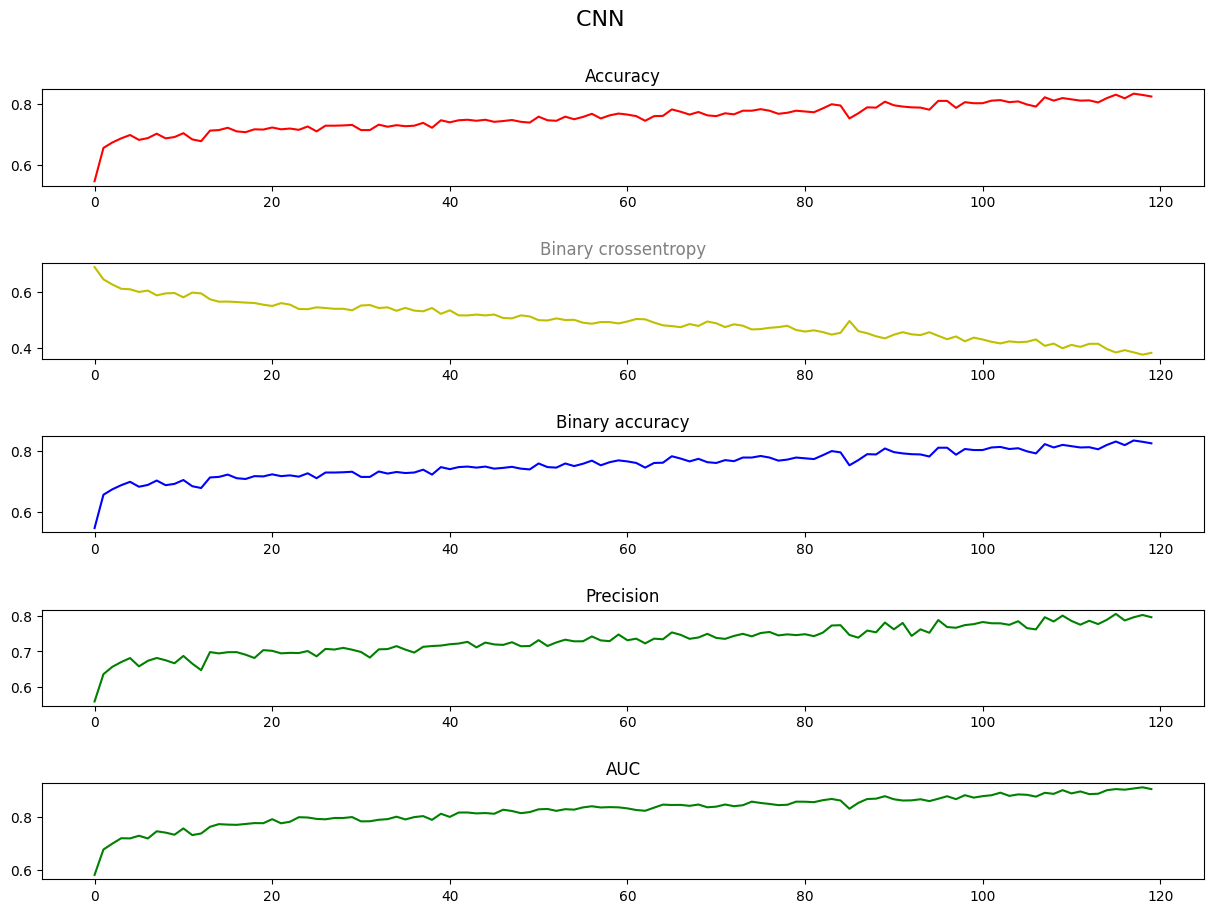

In [ ]:
cvc = pd.DataFrame(columns=['A'])
cvc['Accuracy'] = history.history['accuracy']
cvc['Binary crossentropy'] = history.history['loss']
cvc['Binary accuracy'] = history.history['binary_accuracy']
cvc['Precision'] = history.history['precision_35']
cvc['AUC'] = history.history['auc']
cvc = cvc.drop(columns = 'A')
plotAccuracy(cvc)
cvc.to_csv(tempPath + 'CNN_outPut_history.csv')


<Axes: >

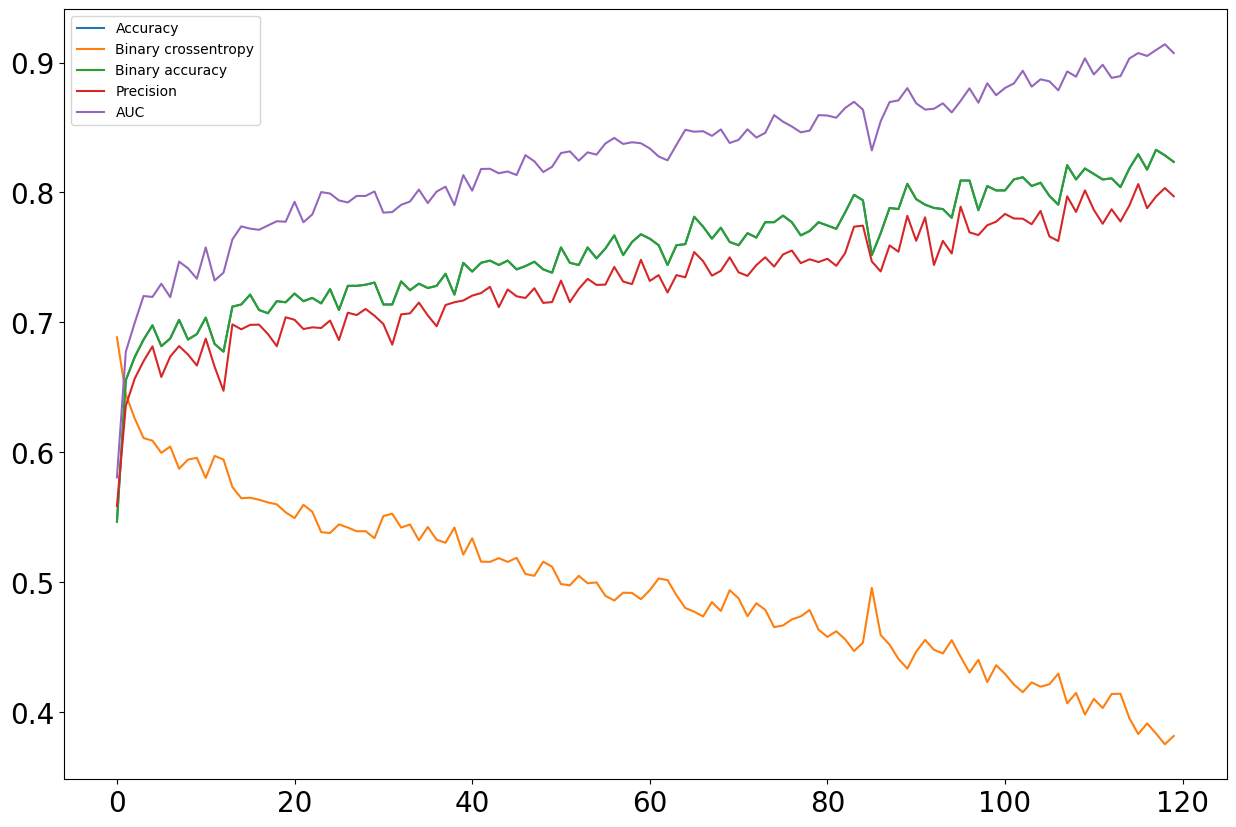

In [ ]:
cvc.plot(figsize=(15, 10), fontsize=20)

In [ ]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

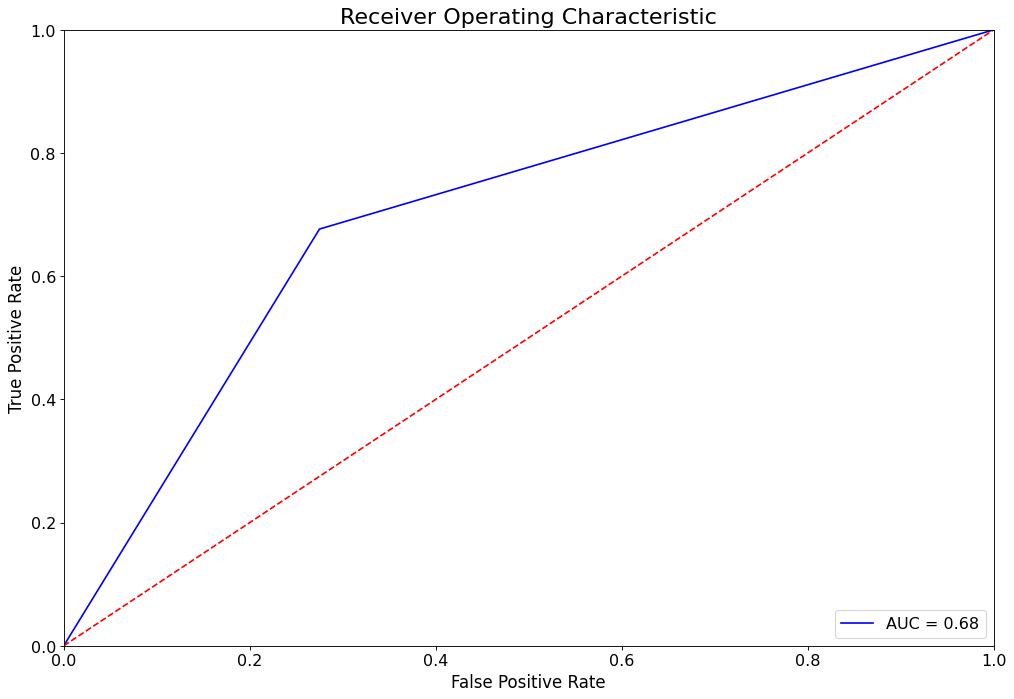

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test, np.round(pred_Te))
roc_auc = auc
# method I: plt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=80)
plt.title('Receiver Operating Characteristic', fontsize=20)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
# title and labels, setting initial sizes

plt.figsize=(25, 20)
plt.show()

In [ ]:
y_pred = model.predict(X_test)
pred_Tr_CNN = model.predict(X_train)

37/37 [==============================] - 4s 98ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

ValueError: ignored

### load and predict based on that

In [ ]:
from tensorflow.keras.models import load_model
modelPath = '/content/drive/My Drive/Models/'

# Load the saved model
model = load_model(modelPath+"CNN_overfitt.h5")

In [ ]:
# Create an empty list to store the patches
patches = []
x_label = []
y_label = []
# Iterate over each patch
for i in range(stack.shape[1]):
    for j in range(stack.shape[0]):
        # Extract the patch from the stack
        patch = stack[j-cell_toBeAdd:j+cell_toBeAdd+1, i-cell_toBeAdd:i+cell_toBeAdd+1,:]
        if (patch.size >= (patch_size*patch_size*stack.shape[2]) and patch.shape[0] == patch_size):
         # Add the patch to the list
         patches.append(patch)
         x_label.append(i)
         y_label.append(j)


In [ ]:
for loopx in range(1,width//rangeSize + 2):
  for loopy in range (1,height // rangeSize + 2):
       patches = []
       x_label = []
       y_label = []
       # Iterate over each patch
       for i in range(rangeSize * (loopx -1) ,rangeSize * loopx):
           for j in range(rangeSize * (loopy -1) ,rangeSize * loopy):
               # Extract the patch from the stack
               patch = stack[j-cell_toBeAdd:j+cell_toBeAdd+1, i-cell_toBeAdd:i+cell_toBeAdd+1,:]
               if (patch.size >= (patch_size*patch_size*stack.shape[2]) and patch.shape[0] == patch_size):
                # Add the patch to the list
                patches.append(patch)
                x_label.append(i)
                y_label.append(j)
       if (len(patches)>0):
        X = np.array(patches).reshape(len(patches),patches[0].shape[0], patches[0].shape[1], patches[0].shape[2])
        patches = None
        pred_CNN = model.predict(X)
        X = None

       # Convert predictions to a list
        predicted_labels = list(pred_CNN.flatten())
        pred_CNN = None

        df = pd.DataFrame({'values':predicted_labels})
        df['x_label'] = x_label
        df['y_label'] = y_label
        print(str(loopx) + '-' + str(loopy))
        df.to_csv(tempPath + str(loopx) + '-' + str(loopy) + '.csv')
        predicted_labels = None
        x_label = None
        y_label = None

360/648 [===============>..............] - ETA: 5s

KeyboardInterrupt: ignored

In [ ]:
for loopx in range(10, width // rangeSize + 1):
  for loopy in range (1,height // rangeSize + 1):
       patches = []
       x_label = []
       y_label = []
       # Iterate over each patch
       for i in range(rangeSize * (loopx -1) ,rangeSize * loopx):
           for j in range(rangeSize * (loopy -1) ,rangeSize * loopy):

               '''
               if(j >= width + patch_size and i >= height + patch_size):
                  break
               if(j >= width + patch_size):
                  continue
               if(i >= height + patch_size):
                  continue
               '''
               # Extract the patch from the stack
               patch = stack[j-cell_toBeAdd:j+cell_toBeAdd+1, i-cell_toBeAdd:i+cell_toBeAdd+1,:]
               if (patch.size >= (patch_size*patch_size*stack.shape[2]) and patch.shape[0] == patch_size):
                # Add the patch to the list
                patches.append(patch)
                x_label.append(i)
                y_label.append(j)
       if (len(patches)>0):
        X = np.array(patches).reshape(len(patches),patches[0].shape[0], patches[0].shape[1], patches[0].shape[2])
        patches = None
        pred_CNN = model.predict(X)
        X = None

       # Convert predictions to a list
        predicted_labels = list(pred_CNN.flatten())
        pred_CNN = None

        df = pd.DataFrame({'values':predicted_labels})
        df['x_label'] = x_label
        df['y_label'] = y_label
        print(str(loopx) + '-' + str(loopy))
        df.to_csv(tempPath + str(loopx) + '-' + str(loopy) + '.csv')
        predicted_labels = None
        x_label = None
        y_label = None

675/675 [==============================] - 12s 17ms/step
10-1
704/704 [==============================] - 12s 17ms/step
10-2
704/704 [==============================] - 10s 15ms/step
10-3
704/704 [==============================] - 10s 14ms/step
10-4
704/704 [==============================] - 11s 15ms/step
10-5
704/704 [==============================] - 11s 15ms/step
10-6
704/704 [==============================] - 12s 16ms/step
10-7
704/704 [==============================] - 14s 20ms/step
10-8
704/704 [==============================] - 12s 17ms/step
10-9
493/493 [==============================] - 9s 17ms/step
10-10
675/675 [==============================] - 12s 18ms/step
11-1
704/704 [==============================] - 13s 19ms/step
11-2
704/704 [==============================] - 12s 17ms/step
11-3
704/704 [==============================] - 11s 15ms/step
11-4
704/704 [==============================] - 12s 17ms/step
11-5
704/704 [==============================] - 12s 17ms/step
11-6
704/704 

In [ ]:
x = None

In [ ]:
dataset = None
stack = None
stackPath = None
x_label = None
y_label = None

In [ ]:
tempPath = '/content/drive/My Drive/tempFile/'

def concatinateDF():
  for loopx in range(1, width // rangeSize + 2):
   for loopy in range (1,height // rangeSize + 2):
      try:
        df = pd.read_csv(tempPath + str(loopx) + '-' + str(loopy) + '.csv', encoding='utf-8-sig')
      except:
        continue
      print(str(loopx) + '-' + str(loopy) )
      if(loopx == 1 and loopy == 1):
        AllDF = df
      else:
        AllDF = pd.concat([AllDF, df])

  return AllDF


In [ ]:
allprediction = concatinateDF()

1-1
1-2
1-3
1-4
1-5
1-6
1-7
1-8
1-9
1-10
2-1
2-2
2-3
2-4
2-5
2-6
2-7
2-8
2-9
2-10
3-1
3-2
3-3
3-4
3-5
3-6
3-7
3-8
3-9
3-10
4-1
4-2
4-3
4-4
4-5
4-6
4-7
4-8
4-9
4-10
5-1
5-2
5-3
5-4
5-5
5-6
5-7
5-8
5-9
5-10
6-1
6-2
6-3
6-4
6-5
6-6
6-7
6-8
6-9
6-10
7-1
7-2
7-3
7-4
7-5
7-6
7-7
7-8
7-9
7-10
8-1
8-2
8-3
8-4
8-5
8-6
8-7
8-8
8-9
8-10
9-1
9-2
9-3
9-4
9-5
9-6
9-7
9-8
9-9
9-10
10-1
10-2
10-3
10-4
10-5
10-6
10-7
10-8
10-9
10-10
11-1
11-2
11-3
11-4
11-5
11-6
11-7
11-8
11-9
11-10
12-1
12-2
12-3
12-4
12-5
12-6
12-7
12-8
12-9
12-10
13-1
13-2
13-3
13-4
13-5
13-6
13-7
13-8
13-9
13-10
14-1
14-2
14-3
14-4
14-5
14-6
14-7
14-8
14-9
14-10
15-1
15-2
15-3
15-4
15-5
15-6
15-7
15-8
15-9
15-10
16-1
16-2
16-3
16-4
16-5
16-6
16-7
16-8
16-9
16-10


In [ ]:
allprediction

Unnamed: 0    values  x_label  y_label
0              0  0.450474        6        6
1              1  0.450439        6        7
2              2  0.450561        6        8
3              3  0.450471        6        9
4              4  0.450719        6       10
...          ...       ...      ...      ...
9970        9970  0.000390     2344     1450
9971        9971  0.000435     2344     1451
9972        9972  0.000474     2344     1452
9973        9973  0.000491     2344     1453
9974        9974  0.000497     2344     1454

[3389211 rows x 4 columns]

In [ ]:
#dataset
# Dataset and parameters

background_class = np.nan
# Determine the shape of the label array
CNN_array = np.full((height, width), background_class)
# Create an empty list to store the patches


# Iterate over the DataFrame rows and mark the asthma points with the asthma class value
for _, row in allprediction.iterrows():
    x = int(row['x_label'])
    y = int(row['y_label'])
    CNN_array[y, x]  = row['values']


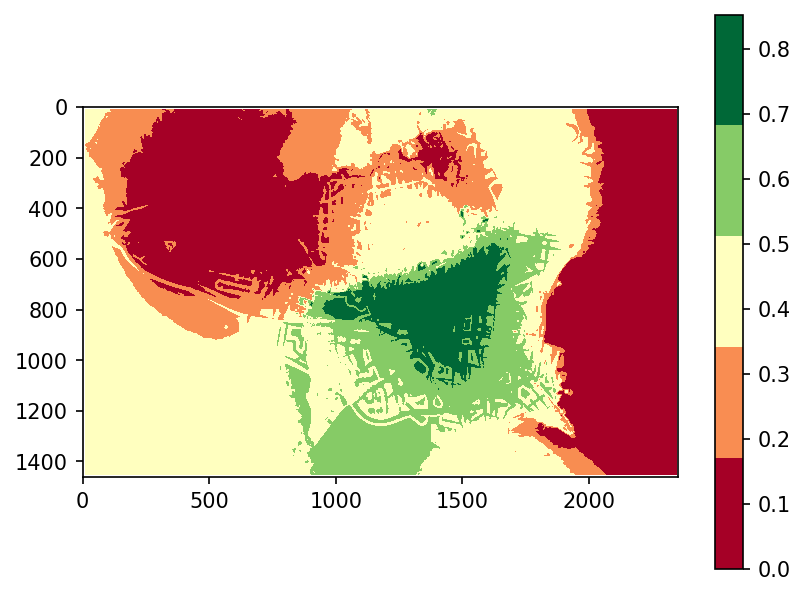

In [ ]:
from matplotlib import cm
new_inferno = cm.get_cmap('RdYlGn', 5)
plt.figure(dpi = 150)
plt.imshow(CNN_array, cmap = new_inferno)
plt.colorbar()
plt.show()

In [ ]:
from osgeo import gdal
import numpy as np

# List of input raster files to stack
#file_list

# Open the first input raster to get the metadata
first_dataset = gdal.Open(TifExportUrl + 'stacked_raster_normalized.tif', gdal.GA_ReadOnly)
driver = gdal.GetDriverByName('GTiff')

# Create the output dataset for the stacked raster
# add two layer for add x and y coordinates
output_dataset = driver.Create(TifExportUrl + 'CNN_prediction.tif', first_dataset.RasterXSize, first_dataset.RasterYSize,
                               1, first_dataset.GetRasterBand(1).DataType)

# Copy projection information from the first dataset
output_dataset.SetProjection(first_dataset.GetProjection())

# Set geotransform
output_dataset.SetGeoTransform(first_dataset.GetGeoTransform())
# Initialize list for stacked arraysS
stacked_array_list = []

band_array = CNN_array
output_band = output_dataset.GetRasterBand(1)
output_band.WriteArray(band_array)

output_band.FlushCache()
src = None
output_dataset.FlushCache()
output_dataset = None

In [ ]:
# Open the first input raster to get the metadata
CNNRaster = gdal.Open(TifExportUrl + 'CNN_prediction.tif', gdal.GA_ReadOnly)
print(CNNRaster.ReadAsArray().shape)

(1461, 2351)


In [ ]:
TifExportUrl = '/content/drive/My Drive/Tif_Export/'
ShapefilesURL='/content/drive/My Drive/ShapeFiles/'
newcounties = gpd.read_file(ShapefilesURL+"Mahalat.shp")

In [ ]:
raster_pk = rasterio.open( TifExportUrl + 'CNN_prediction.tif')
out_image_pk, out_transform_pk = rasterio.mask.mask(raster_pk, newcounties.geometry.values, crop = True)


plot model

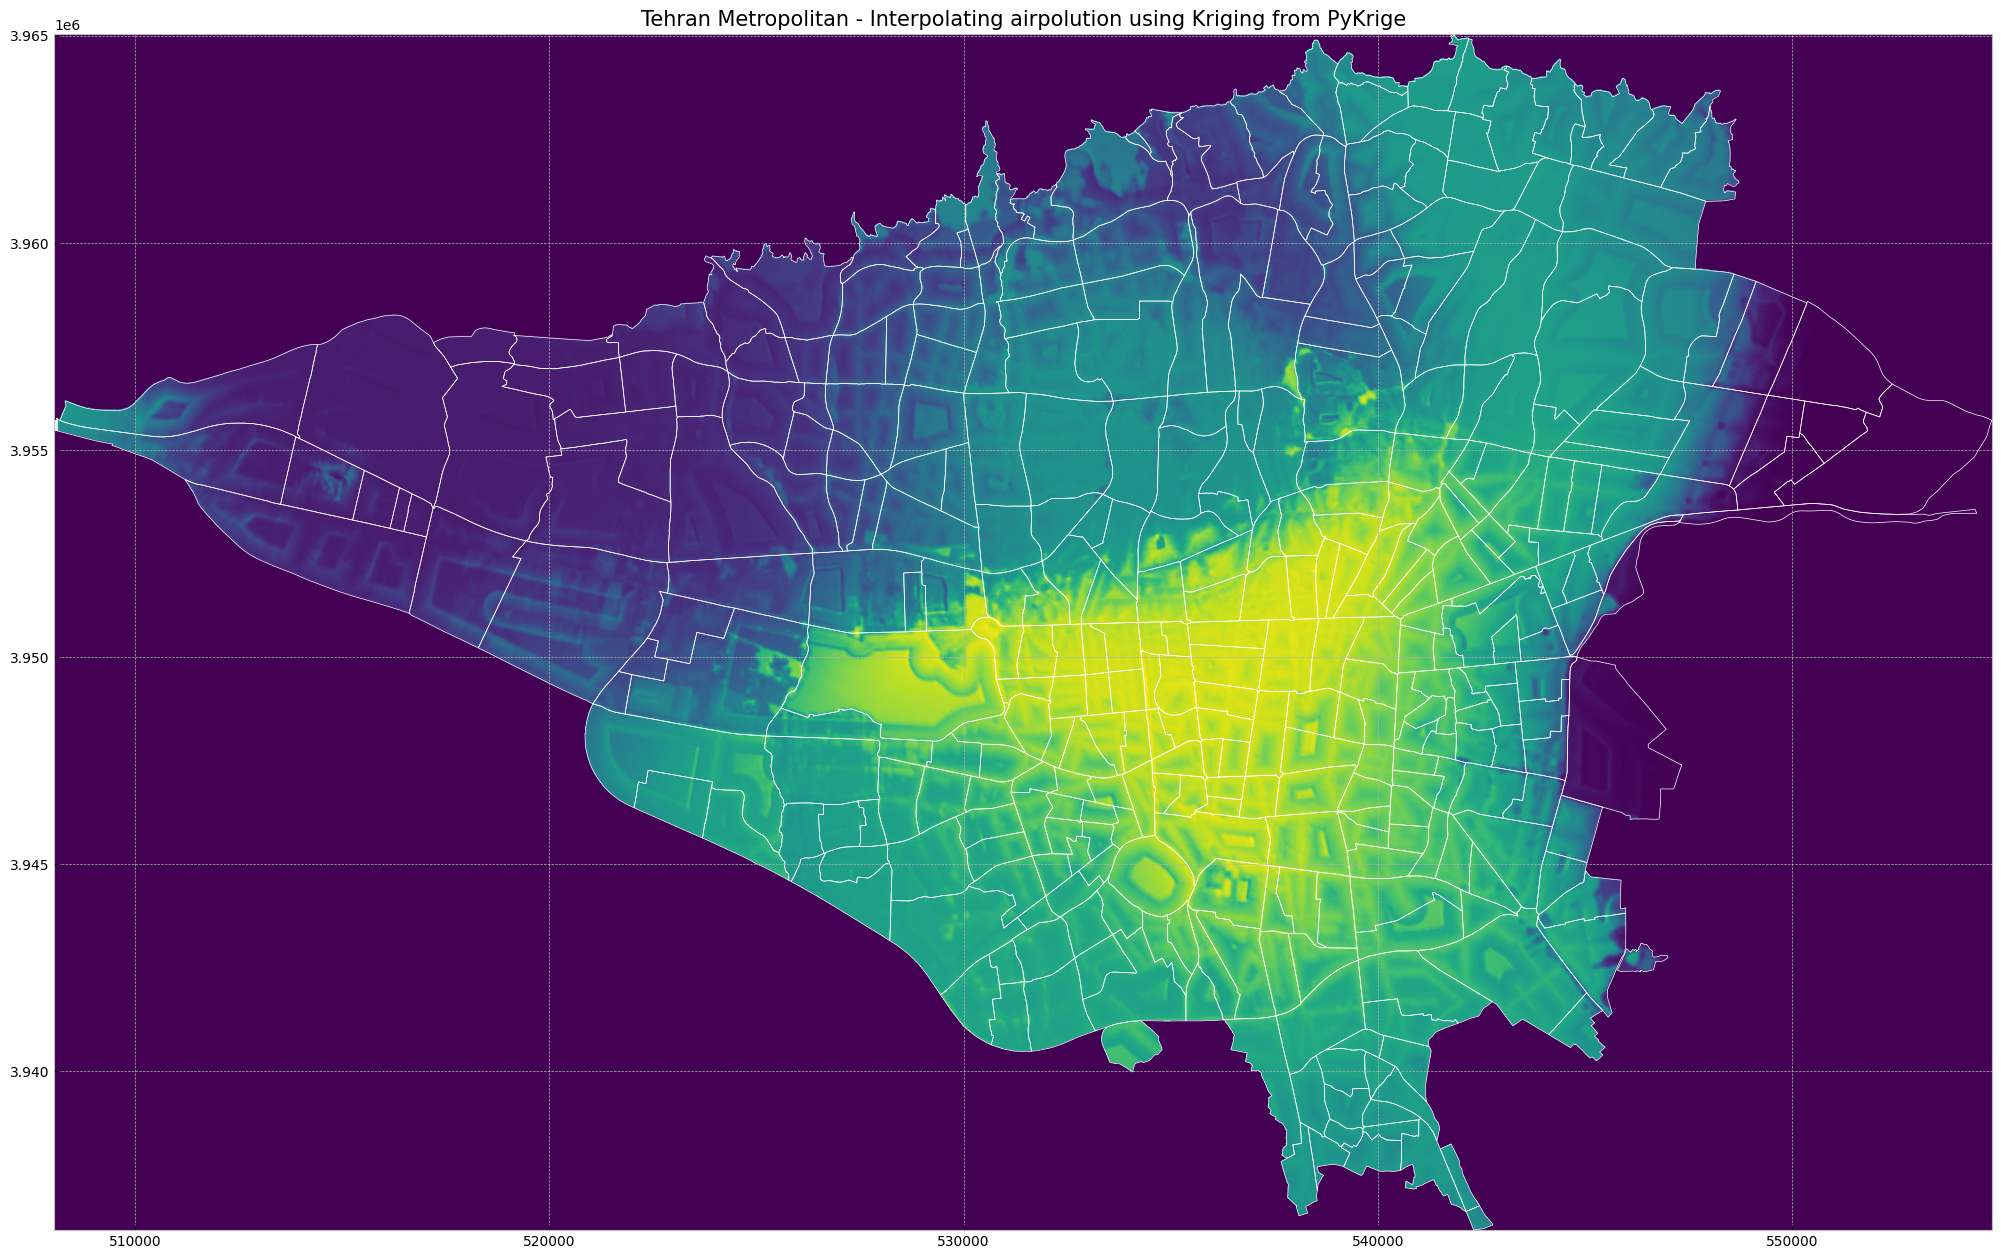

In [ ]:
import matplotlib.colors as clr
import matplotlib as mpl
# Open raster

#cmap = clr.LinearSegmentedColormap.from_list('cmap_name',  ['green','yellow','orange','red','purple','maroon'], N=100)

# Stylize plots
plt.style.use('bmh')

# Plot data
#fig, ax = plt.subplots(1, figsize = (25, 20))

#show(out_image_sk, ax = ax, transform = out_transform_sk, cmap = cmap, vmin=50, vmax=200 ,interpolation = 'nearest')

# Stylize plots
plt.style.use('bmh')

# Plot data
#plt.figure(figsize=(25,20))
fig, ax = plt.subplots(1, figsize = (25, 20))
show(out_image_pk, ax = ax, transform = out_transform_pk)
#ax.plot(x_airpolution, y_airpolution, 'k.', markersize = 20, alpha = 0.5)
newcounties.plot(ax = ax, color = 'none', edgecolor = 'white')
#plt.gca().invert_yaxis()

# Set title
ax.set_title('Tehran Metropolitan - Interpolating airpolution using Kriging from PyKrige', fontdict = {'fontsize': '15', 'fontweight' : '3'})

# Display plot
plt.show()

In [ ]:
#CropMap
cropMaps(raster_pk,newcounties,"CNNCROP")

In [ ]:
Raster = gdal.Open(TifExportUrl + 'CNNCROP.tif', gdal.GA_ReadOnly)
RasterArray = Raster.ReadAsArray()
BinaryArray = np.where(RasterArray > 0.5, 1, 0)
from osgeo import gdal
import numpy as np

# List of input raster files to stack
#file_list

# Open the first input raster to get the metadata
first_dataset = gdal.Open(TifExportUrl + 'stacked_raster_normalized.tif', gdal.GA_ReadOnly)
driver = gdal.GetDriverByName('GTiff')

# Create the output dataset for the stacked raster
# add two layer for add x and y coordinates
output_dataset = driver.Create(TifExportUrl + 'CNN_Binary.tif', first_dataset.RasterXSize, first_dataset.RasterYSize,
                              1, first_dataset.GetRasterBand(1).DataType)

# Copy projection information from the first dataset
output_dataset.SetProjection(first_dataset.GetProjection())

# Set geotransform
output_dataset.SetGeoTransform(first_dataset.GetGeoTransform())
# Initialize list for stacked arrays
stacked_array_list = []
band_array = BinaryArray
output_band = output_dataset.GetRasterBand(1)
output_band.WriteArray(band_array)
output_band.FlushCache()
src = None
output_dataset.FlushCache()
output_dataset = None
# Open the first input raster to get the metadata
mlpRadter = gdal.Open(TifExportUrl + 'CNN_Binary.tif', gdal.GA_ReadOnly)
print(mlpRadter.ReadAsArray().shape)

(1461, 2351)
